In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from operator import attrgetter
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [5]:
data.shape

(1460, 81)

##### Checking the distribution of dependent variable i.e SalesPrice

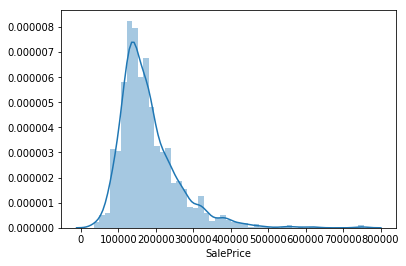

In [6]:
sns.distplot(data.SalePrice)

The SalesPrice is left queue and will have to convert to normal distribution.
Hence using the log transformation for the conversion of SalePrice column

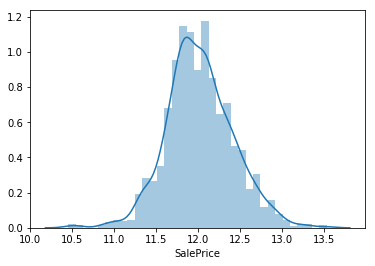

In [7]:
sns.distplot(np.log(data.SalePrice))

"log" has converted it to normal distribution

In [8]:
data.SalePrice = np.log(data.SalePrice)

In [9]:
#Checking if we have any duplicate records
data[data.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

##### Finding the column with missing data

In [10]:
missingDataColumn = list(data.columns[(round((data.isna().sum()/len(data))*100,2) != 0)])

In [11]:
round((data[missingDataColumn].isna().sum()/len(data))*100,2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [12]:
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
# Replacing NA with the median value since, both mean and meadian are almost equal
data.LotFrontage = data.LotFrontage.fillna(70)

In [14]:
data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [15]:
# In Alley column, NA is to define that there in no Alley, Hence replacing NA with a value "No" 
data.Alley = data.Alley.fillna('No')

In [16]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [17]:
# Replacing NA with None since it means there is no Masonry veneer type in those houses
data.MasVnrType = data.MasVnrType.fillna('None')

In [18]:
# Similarly replacing NA with 0 in in Masonry veneer area column
data.MasVnrArea = data.MasVnrArea.fillna(0)

In [19]:
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [20]:
# Replacing NA values with "No", since, there is no basement in those house
data.BsmtQual = data.BsmtQual.fillna("No")

In [21]:
# Similarly we can replace NA with No in general condition of the basement(BsmtCond) column
data.BsmtCond = data.BsmtCond.fillna('No')

In [22]:
data.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [23]:
# Replacing NA with None, Since, there is no basement those houses
data.BsmtExposure = data.BsmtExposure.fillna('None')

In [24]:
data.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [25]:
# Replacing NA with None, Since, there is no basement those houses
data.BsmtFinType1 = data.BsmtFinType1.fillna('None')

In [26]:
data.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [27]:
# Replacing NA with None, Since, there is no basement those houses
data.BsmtFinType2 = data.BsmtFinType2.fillna('None')

In [28]:
data.Electrical.isna().sum()

1

In [29]:
# Removing the row with NA value in Electrical since there in only 1 such row
data = data[~data.Electrical.isna()]

In [30]:
data.shape

(1459, 81)

In [31]:
data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [32]:
# Replacing NA with No since there are no Fireplace in those houses
data.FireplaceQu = data.FireplaceQu.fillna('No')

In [33]:
# Replcaing NA with No in garage location(GarageType) column
data.GarageType = data.GarageType.fillna('No')

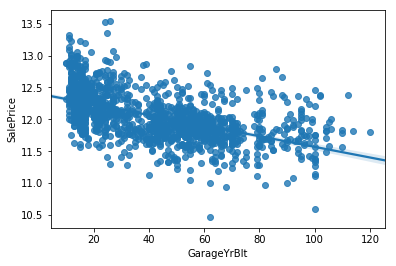

In [34]:
sns.regplot(2020 - data.GarageYrBlt, data.SalePrice)

In [35]:
# Replacing NA with the year 1900, since there is no garage in those houses.
# The price of house decreses as the garage gets older
# And we are going to subtract year of build from the current
# If we keep 0 in place of NA as the difference of the year
# then it makes the model think that those houses have new garages
# but actually they don't even have a gargae.
# Hence replacing NA with the oldest value to counter the effect
data.GarageYrBlt = 2020 - data.GarageYrBlt.fillna(1900)

In [36]:
data.GarageFinish = data.GarageFinish.fillna('No')

In [37]:
data.GarageQual = data.GarageQual.fillna('No')

In [38]:
data.GarageCond = data.GarageCond.fillna('No')

In [39]:
data.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [40]:
# Droping PoolQC, since there less than 1% of houses with pool in our data set
data.drop('PoolQC', axis=1, inplace = True)

In [41]:
# Replcaing NA with No for houses with no fence
data.Fence = data.Fence.fillna('No')

In [42]:
data.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [43]:
# Droping PoolQC, since there less than 4% of houses with Miscellaneous feature in our data set
data.drop('MiscFeature', axis=1, inplace = True)

In [44]:
missingDataColumn.remove('MiscFeature')
missingDataColumn.remove('PoolQC')

In [45]:
# Checking if there are column left with NA values
round((data[missingDataColumn].isna().sum()/len(data))*100,2)

LotFrontage     0.0
Alley           0.0
MasVnrType      0.0
MasVnrArea      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
FireplaceQu     0.0
GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
Fence           0.0
dtype: float64

In [46]:
# Droping Id column since it's the unique value column
data.drop('Id', axis=1, inplace= True)

In [47]:
data['dateSold'] = pd.to_datetime(data.MoSold.astype(np.str)+"/"+data.YrSold.astype(np.str)).dt.to_period('M')

In [48]:
data[['dateSold','MoSold','YrSold']].head()

dateSold  MoSold  YrSold
0  2008-02       2    2008
1  2007-05       5    2007
2  2008-09       9    2008
3  2006-02       2    2006
4  2008-12      12    2008

In [49]:
# Taking current month
data['currentDate'] = pd.datetime(2020,5,1)

In [50]:
data['currentDate'] = data.currentDate.dt.to_period('M')

In [51]:
# output of subtraction of the date type column works differenctly for different version of the library
try:
    data['MoSoldLast'] = (data.currentDate - data.dateSold)
    data['MoSoldLast'] = data['MoSoldLast'].astype(np.int)
except:
    data['MoSoldLast'] = (data.currentDate - data.dateSold).apply(attrgetter('n'))

data['MoSoldLast'].head()

0    147
1    156
2    140
3    171
4    137
Name: MoSoldLast, dtype: int32

In [224]:
# Keeping the number of how many months before the houses were sold and droping the rest columns
data.drop(['dateSold','MoSold','YrSold','currentDate'], axis=1, inplace=True)

In [225]:
data['YearOld'] = 2020 - data.YearBuilt 

In [226]:
data['YearRemodOld'] = 2020 - data.YearRemodAdd

In [227]:
# Calculated the number years before build and renovated and removing the year columns of the same
data.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

## EDA

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
MasVnrArea       1459 

In [229]:
# Checking the numeric columns
data.select_dtypes(np.number)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0             60         65.0     8450            7            5       196.0   
1             20         80.0     9600            6            8         0.0   
2             60         68.0    11250            7            5       162.0   
3             70         60.0     9550            7            5         0.0   
4             60         84.0    14260            8            5       350.0   
5             50         85.0    14115            5            5         0.0   
6             20         75.0    10084            8            5       186.0   
7             60         70.0    10382            7            6       240.0   
8             50         51.0     6120            7            5         0.0   
9            190         50.0     7420            5            6         0.0   
10            20         70.0    11200            5            5         0.0   
11            60         85.0    11924            9            5       286.0   
12            20         70.0    12968            5            6         0.0   
13            20         91.0    10652            7            5       306.0   
14            20         70.0    10920            6            5       212.0   
15            45         51.0     6120            7            8         0.0   
16            20         70.0    11241            6            7       180.0   
17            90         72.0    10791            4            5         0.0   
18            20         66.0    13695            5            5         0.0   
19            20         70.0     7560            5            6         0.0   
20            60        101.0    14215            8            5       380.0   
21            45         57.0     7449            7            7         0.0   
22            20         75.0     9742            8            5       281.0   
23           120         44.0     4224            5            7         0.0   
24            20         70.0     8246            5            8         0.0   
25            20        110.0    14230            8            5       640.0   
26            20         60.0     7200            5            7         0.0   
27            20         98.0    11478            8            5       200.0   
28            20         47.0    16321            5            6         0.0   
29            30         60.0     6324            4            6         0.0   
...          ...          ...      ...          ...          ...         ...   
1430          60         60.0    21930            5            5         0.0   
1431         120         70.0     4928            6            6         0.0   
1432          30         60.0    10800            4            6         0.0   
1433          60         93.0    10261            6            5       318.0   
1434          20         80.0    17400            5            5         0.0   
1435          20         80.0     8400            6            9       237.0   
1436          20         60.0     9000            4            6         0.0   
1437          20         96.0    12444            8            5       426.0   
1438          20         90.0     7407            6            7         0.0   
1439          60         80.0    11584            7            6        96.0   
1440          70         79.0    11526            6            7         0.0   
1441         120         70.0     4426            6            5       147.0   
1442          60         85.0    11003           10            5       160.0   
1443          30         70.0     8854            6            6         0.0   
1444          20         63.0     8500            7            5       106.0   
1445          85         70.0     8400            6            5         0.0   
1446          20         70.0    26142            5            7       189.0   
1447          60         80.0    10000            8            5       438.0   
1448  

In [230]:
# Checking the categorical column
data.select_dtypes(np.object)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave    No      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave    No      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave    No      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave    No      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave    No      IR2         Lvl    AllPub    Inside       Gtl   
13         RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave    No      IR1         Lvl    AllPub    Corner       Gtl   
15         RM   Pave    No      Reg         Lvl    AllPub    Corner       Gtl   
16         RL   Pave    No      IR1         Lvl    AllPub   CulDSac       Gtl   
17         RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave    No      IR1         Lvl    AllPub    Corner       Gtl   
21         RM   Pave  Grvl      Reg         Bnk    AllPub    Inside       Gtl   
22         RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
23         RM   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
24         RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
25         RL   Pave    No      Reg         Lvl    AllPub    Corner       Gtl   
26         RL   Pave    No      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
28         RL   Pave    No      IR1         Lvl    AllPub   CulDSac       Gtl   
29         RM   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1430       RL   Pave    No      IR3         Lvl    AllPub    Inside       Gtl   
1431       RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
1432       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1433       RL   Pave    No      IR1         Lvl    AllPub    Inside       Gtl   
1434       RL   Pave    No      Reg         Low    AllPub    Inside       Mod   
1435       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1436       RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl   
1437       RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl   
1438       RM   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1439       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1440       RL   Pave    No      IR1         Bnk    AllPub    Inside       Mod   
1441       RM   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1442       FV   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1443       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1444       RL   Pave    No      Reg         Lvl    AllPub       FR2       Gtl   
1445       RL   Pave    No      Reg         Lvl    AllPub    Inside       Gtl   
1446       RL   Pave    No      IR1         Lvl    AllPub   CulDSac       Gtl   
1447       RL   Pave    No      Reg 

In [231]:
data.shape

(1459, 77)

In [232]:
# Checking categories in each of the categorical column
temp =[data[key].value_counts() for key in dict(data.dtypes) if data[key].dtype == np.object]

In [233]:
for each in temp:
    print(each)
    print("\n")

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1453
Grvl       6
Name: Street, dtype: int64


No      1368
Grvl      50
Pave      41
Name: Alley, dtype: int64


Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste 

##### There are few columns with atleast 96% of data in it of only one type. Hence droping those colums

In [234]:
data.drop(['Street', 'Utilities', 'RoofMatl', 'Heating'], axis=1, inplace= True)

In [235]:
plt.figure(figsize=(20, 20))
def drawCatPlot(col, i):
    #plt.subplot(20,2,i)
    sns.boxplot(x = col, y = 'SalePrice', data = data)
    plt.show()

<Figure size 1440x1440 with 0 Axes>

#### Graphical analysis on the categorical data

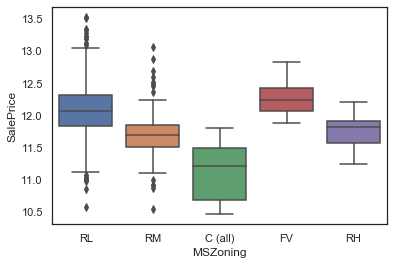

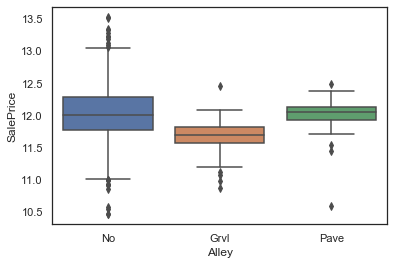

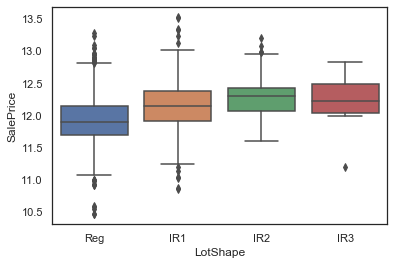

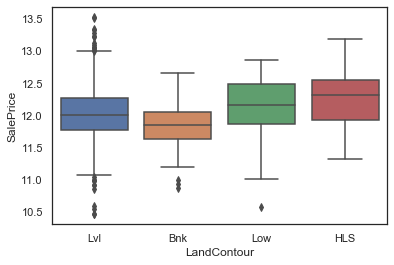

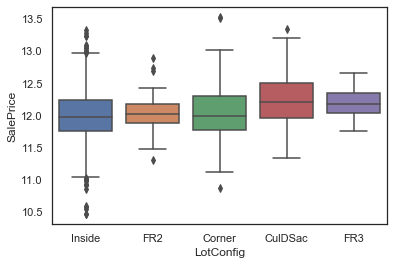

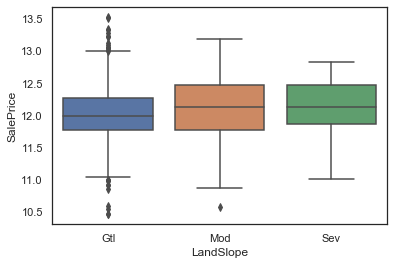

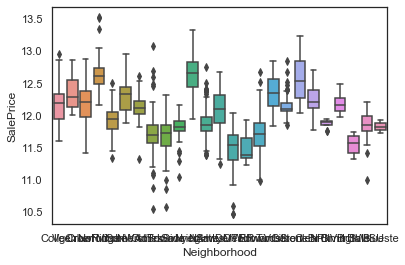

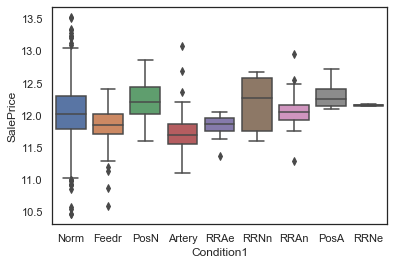

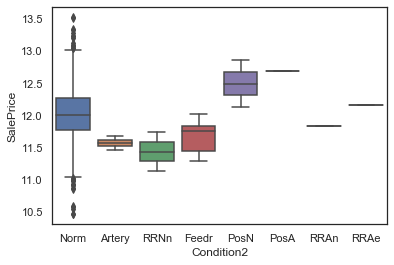

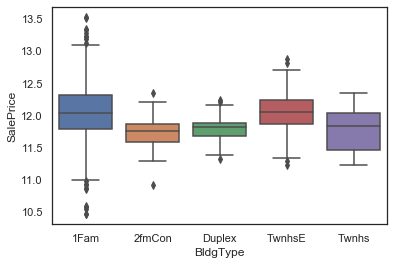

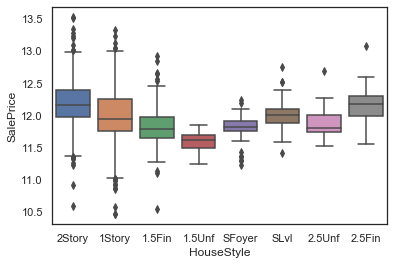

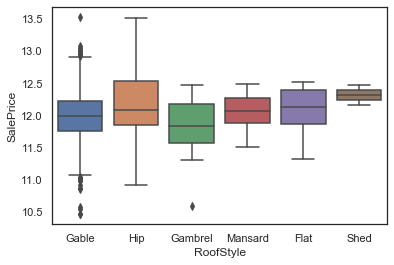

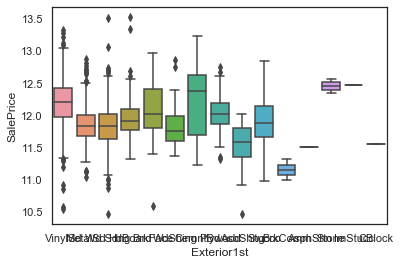

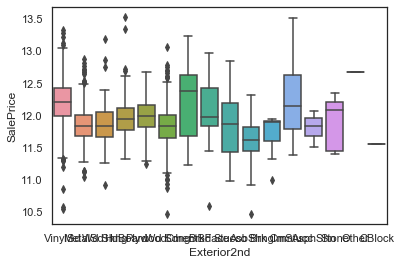

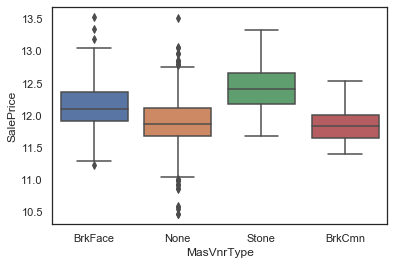

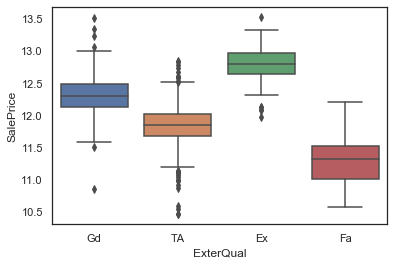

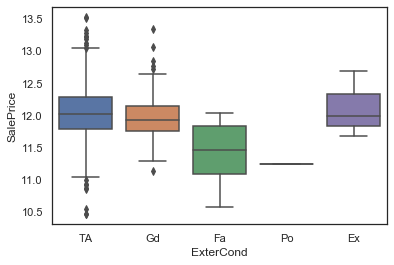

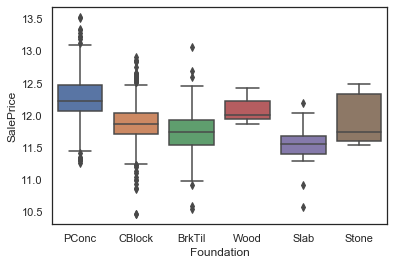

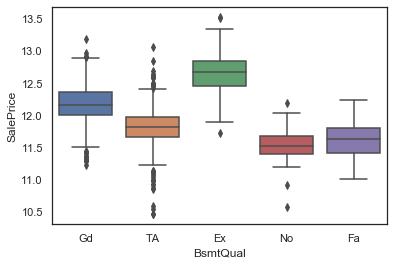

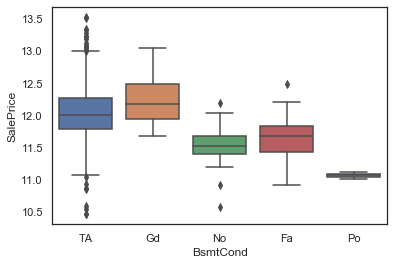

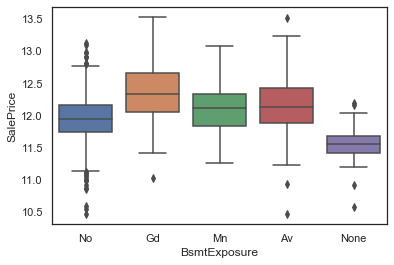

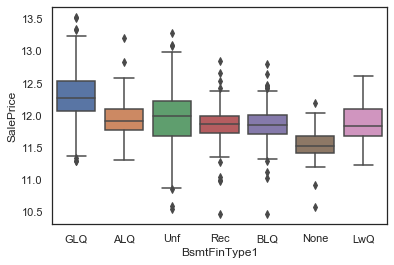

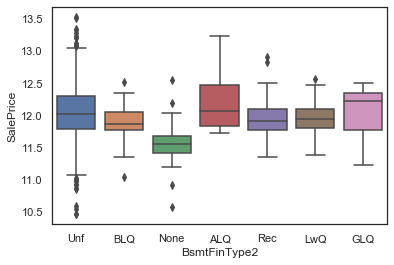

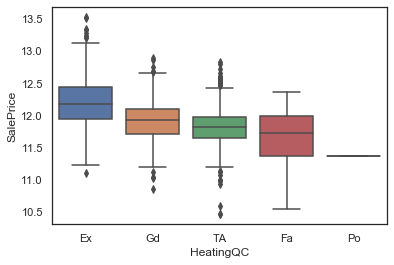

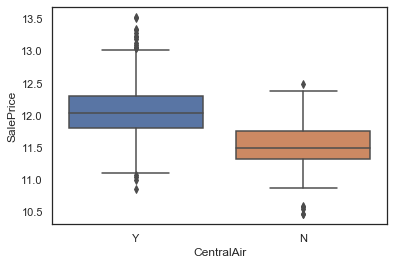

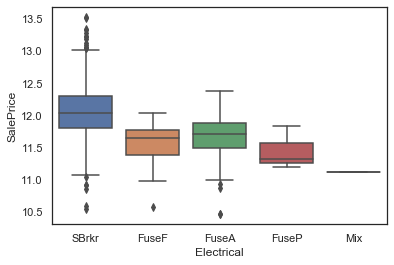

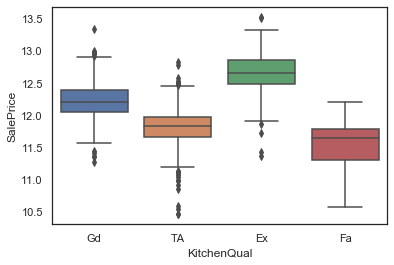

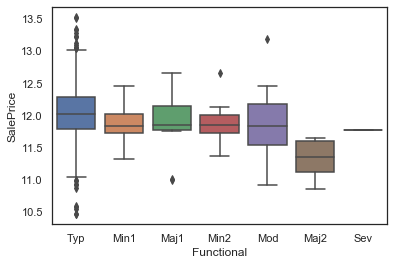

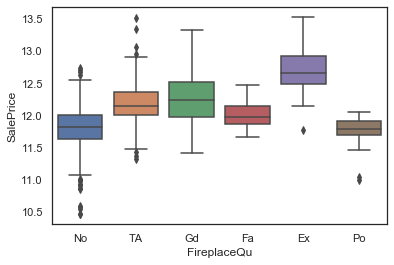

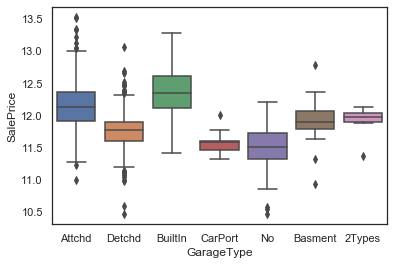

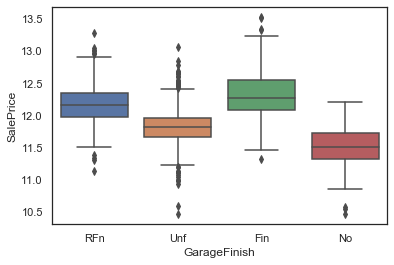

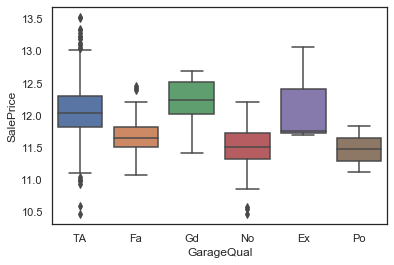

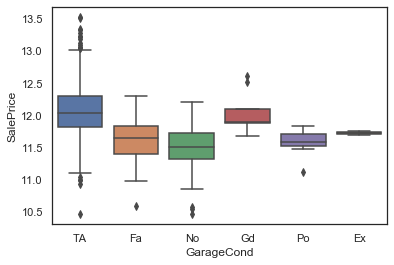

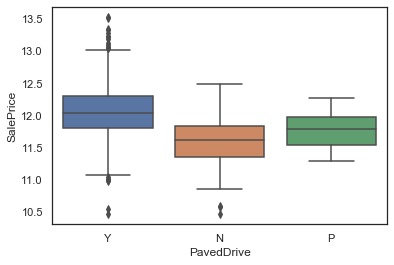

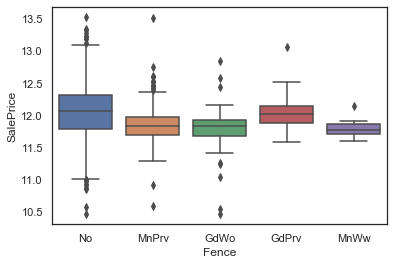

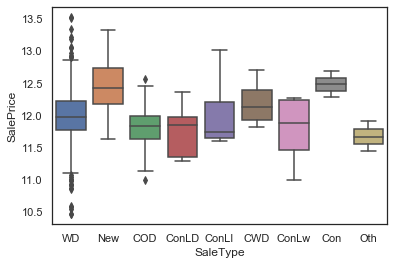

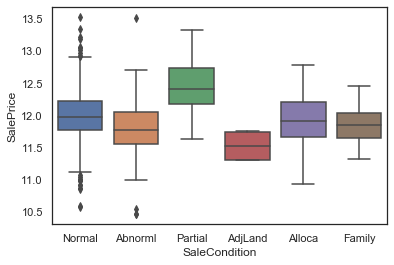

In [236]:
for i, colName in enumerate(data.select_dtypes(np.object).columns):
    drawCatPlot(colName, i+1)

#### Graphical analysis on the numeric data

In [237]:
numcol = list(data.select_dtypes(np.number).columns)

numcol.remove('SalePrice')

numcol

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSoldLast',
 'YearOld',
 'YearRemodOld']

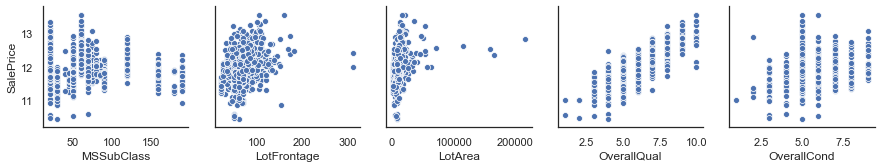

In [238]:
sns.pairplot(data = data, x_vars = numcol[0:5], y_vars = 'SalePrice')

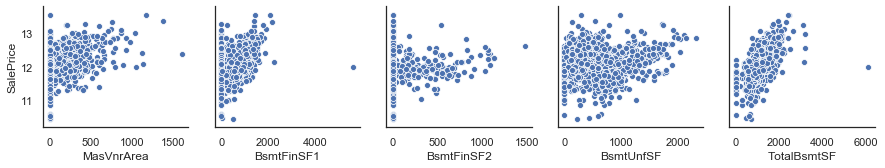

In [239]:
sns.pairplot(data = data, x_vars = numcol[5:10], y_vars = 'SalePrice')

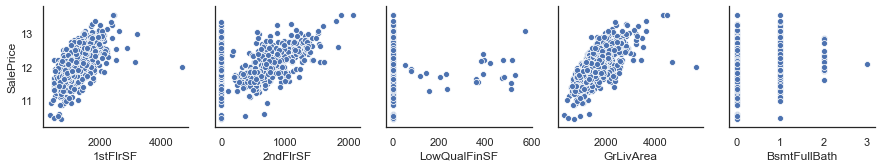

In [240]:
sns.pairplot(data = data, x_vars = numcol[10:15], y_vars = 'SalePrice')

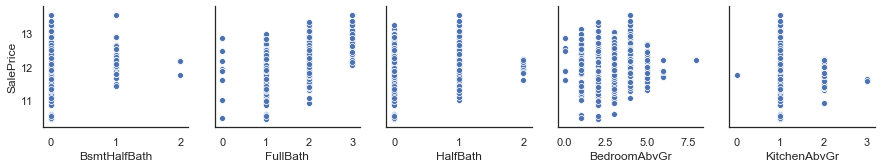

In [241]:
sns.pairplot(data = data, x_vars = numcol[15:20], y_vars = 'SalePrice')

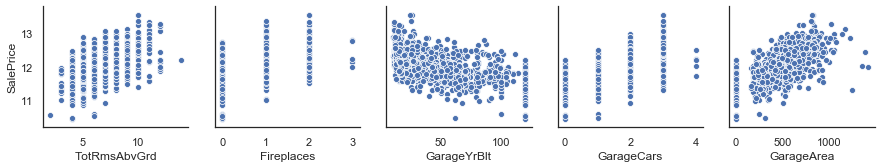

In [242]:
sns.pairplot(data = data, x_vars = numcol[20:25], y_vars = 'SalePrice')

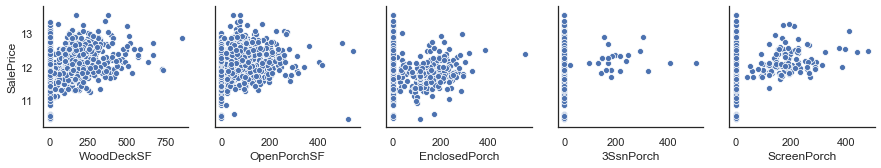

In [243]:
sns.pairplot(data = data, x_vars = numcol[25:30], y_vars = 'SalePrice')

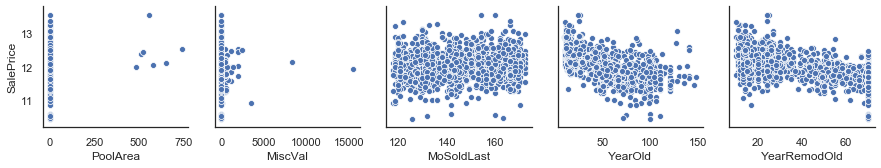

In [244]:
sns.pairplot(data = data, x_vars = numcol[30:35], y_vars = 'SalePrice')

##### From the graphs above, no variable requires transformation for now
##### But need to change the ordinal varibale to numeric values

In [245]:
def convertRatingToValue(col):
    return col.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No':0})

In [246]:
transformCol = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
               'GarageCond']

In [247]:
data[transformCol] = data[transformCol].apply(convertRatingToValue)

data[transformCol].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
0          4          3         4         3          5            4   
1          3          3         4         3          5            3   
2          4          3         4         3          5            4   
3          3          3         3         4          4            4   
4          4          3         4         3          5            4   

   FireplaceQu  GarageQual  GarageCond  
0            0           3           3  
1            3           3           3  
2            3           3           3  
3            4           3           3  
4            3           3           3

In [248]:
data.BsmtExposure.value_counts()

No      952
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [249]:
data.BsmtExposure = data.BsmtExposure.map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})

In [250]:
data.BsmtFinType1 = data.BsmtFinType1.map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})

In [251]:
data.BsmtFinType2 = data.BsmtFinType2.map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})

In [252]:
data.CentralAir = data.CentralAir.map({'Y':1, 'N':0})

###### Converting other categorical variables using the one hot encoding

In [253]:
catList = list(data.select_dtypes(np.object).columns)
catList

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [254]:
for colName in catList:
    dummy_var = pd.get_dummies(data[colName], drop_first=True, prefix=colName)
    data.drop(colName, axis=1, inplace=True)
    data = pd.concat([data, dummy_var], axis=1)

In [255]:
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  ...  SaleType_ConLI  \
0          4          3         4         3  ...               0   
1          3          3         4         3  ...               0   
2          4          3         4         3  ...               0   
3          3          3         3         4  ...               0   
4          4          3         4         3  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 197 columns]

In [256]:
data.select_dtypes(np.object).columns

Index([], dtype='object')

##### Merging Condition1 and Condition2 dummy columns, since both columns have the same information

In [257]:
data['Condition_Feedr'] = data.apply(lambda row: 1 if (row['Condition1_Feedr']==1) | (row['Condition2_Feedr']==1) else 0, axis=1)

In [258]:
data.drop(['Condition1_Feedr','Condition2_Feedr'], axis =1 , inplace=True)

In [259]:
data['Condition_Norm'] = data.apply(lambda row: 1 if (row['Condition1_Norm']==1) | (row['Condition2_Norm']==1) else 0, axis=1)
data.drop(['Condition1_Norm','Condition2_Norm'], axis =1 , inplace=True)

In [260]:
data['Condition_PosA'] = data.apply(lambda row: 1 if (row['Condition1_PosA']==1) | (row['Condition2_PosA']==1) else 0, axis=1)
data.drop(['Condition1_PosA','Condition2_PosA'], axis =1 , inplace=True)

In [261]:
data['Condition_PosN'] = data.apply(lambda row: 1 if (row['Condition1_PosN']==1) | (row['Condition2_PosN']==1) else 0, axis=1)
data.drop(['Condition1_PosN','Condition2_PosN'], axis =1 , inplace=True)

In [262]:
data['Condition_RRAe'] = data.apply(lambda row: 1 if (row['Condition1_RRAe']==1) | (row['Condition2_RRAe']==1) else 0, axis=1)
data.drop(['Condition1_RRAe','Condition2_RRAe'], axis =1 , inplace=True)

In [263]:
data['Condition_RRAn'] = data.apply(lambda row: 1 if (row['Condition1_RRAn']==1) | (row['Condition2_RRAn']==1) else 0, axis=1)
data.drop(['Condition1_RRAn','Condition2_RRAn'], axis =1 , inplace=True)

In [264]:
data['Condition_RRNe'] = data.apply(lambda row: 1 if (row['Condition1_RRNe']==1) else 0, axis=1)
data.drop(['Condition1_RRNe'], axis =1 , inplace=True)

In [265]:
data['Condition_RRNn'] = data.apply(lambda row: 1 if (row['Condition1_RRNn']==1) | (row['Condition2_RRNn']==1) else 0, axis=1)
data.drop(['Condition1_RRNn','Condition2_RRNn'], axis =1 , inplace=True)

#### Merging Exterior1st and Exterior2nd

In [266]:
data['Exterior_AsphShn'] = data.apply(lambda row: 1 if (row['Exterior1st_AsphShn']==1) | (row['Exterior2nd_AsphShn']==1) else 0, axis=1)
data.drop(['Exterior1st_AsphShn','Exterior2nd_AsphShn'], axis =1 , inplace=True)

In [267]:
data['Exterior_BrkComm'] = data.apply(lambda row: 1 if (row['Exterior1st_BrkComm']==1) | (row['Exterior2nd_Brk Cmn']==1) else 0, axis=1)
data.drop(['Exterior1st_BrkComm','Exterior2nd_Brk Cmn'], axis =1 , inplace=True)

In [268]:
data['Exterior_BrkFace'] = data.apply(lambda row: 1 if (row['Exterior1st_BrkFace']==1) | (row['Exterior2nd_BrkFace']==1) else 0, axis=1)
data.drop(['Exterior1st_BrkFace','Exterior2nd_BrkFace'], axis =1 , inplace=True)

In [269]:
data['Exterior_CBlock'] = data.apply(lambda row: 1 if (row['Exterior1st_CBlock']==1) | (row['Exterior2nd_CBlock']==1) else 0, axis=1)
data.drop(['Exterior1st_CBlock','Exterior2nd_CBlock'], axis =1 , inplace=True)

In [270]:
data['Exterior_CmentBd'] = data.apply(lambda row: 1 if (row['Exterior1st_CemntBd']==1) | (row['Exterior2nd_CmentBd']==1) else 0, axis=1)
data.drop(['Exterior1st_CemntBd','Exterior2nd_CmentBd'], axis =1 , inplace=True)

In [271]:
data['Exterior_HdBoard'] = data.apply(lambda row: 1 if (row['Exterior1st_HdBoard']==1) | (row['Exterior2nd_HdBoard']==1) else 0, axis=1)
data.drop(['Exterior1st_HdBoard','Exterior2nd_HdBoard'], axis =1 , inplace=True)

In [272]:
data['Exterior_ImStucc'] = data.apply(lambda row: 1 if (row['Exterior1st_ImStucc']==1) | (row['Exterior2nd_ImStucc']==1) else 0, axis=1)
data.drop(['Exterior1st_ImStucc','Exterior2nd_ImStucc'], axis =1 , inplace=True)

In [273]:
data['Exterior_MetalSd'] = data.apply(lambda row: 1 if (row['Exterior1st_MetalSd']==1) | (row['Exterior2nd_MetalSd']==1) else 0, axis=1)
data.drop(['Exterior1st_MetalSd','Exterior2nd_MetalSd'], axis =1 , inplace=True)

In [274]:
data['Exterior_Plywood'] = data.apply(lambda row: 1 if (row['Exterior1st_Plywood']==1) | (row['Exterior2nd_Plywood']==1) else 0, axis=1)
data.drop(['Exterior1st_Plywood','Exterior2nd_Plywood'], axis =1 , inplace=True)

In [275]:
data['Exterior_Other'] = data['Exterior2nd_Other']
data.drop(['Exterior2nd_Other'], axis =1 , inplace=True)

In [276]:
data['Exterior_Stone'] = data.apply(lambda row: 1 if (row['Exterior1st_Stone']==1) | (row['Exterior2nd_Stone']==1) else 0, axis=1)
data.drop(['Exterior1st_Stone','Exterior2nd_Stone'], axis =1 , inplace=True)

In [277]:
data['Exterior_Stucco'] = data.apply(lambda row: 1 if (row['Exterior1st_Stucco']==1) | (row['Exterior2nd_Stucco']==1) else 0, axis=1)
data.drop(['Exterior1st_Stucco','Exterior2nd_Stucco'], axis =1 , inplace=True)

In [278]:
data['Exterior_VinylSd'] = data.apply(lambda row: 1 if (row['Exterior1st_VinylSd']==1) | (row['Exterior2nd_VinylSd']==1) else 0, axis=1)
data.drop(['Exterior1st_VinylSd','Exterior2nd_VinylSd'], axis =1 , inplace=True)

In [279]:
data['Exterior_WdSdng'] = data.apply(lambda row: 1 if (row['Exterior1st_Wd Sdng']==1) | (row['Exterior2nd_Wd Sdng']==1) else 0, axis=1)
data.drop(['Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng'], axis =1 , inplace=True)

In [280]:
data['Exterior_WdShing'] = data.apply(lambda row: 1 if (row['Exterior1st_WdShing']==1) | (row['Exterior2nd_Wd Shng']==1) else 0, axis=1)
data.drop(['Exterior1st_WdShing','Exterior2nd_Wd Shng'], axis =1 , inplace=True)

In [281]:
data.filter(regex = 'Exterior.*').columns

Index(['Exterior_AsphShn', 'Exterior_BrkComm', 'Exterior_BrkFace',
       'Exterior_CBlock', 'Exterior_CmentBd', 'Exterior_HdBoard',
       'Exterior_ImStucc', 'Exterior_MetalSd', 'Exterior_Plywood',
       'Exterior_Other', 'Exterior_Stone', 'Exterior_Stucco',
       'Exterior_VinylSd', 'Exterior_WdSdng', 'Exterior_WdShing'],
      dtype='object')

### Checking the correlation between columns

In [282]:
data.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass               1.000000    -0.357132 -0.139766     0.032936   
LotFrontage             -0.357132     1.000000  0.306699     0.234353   
LotArea                 -0.139766     0.306699  1.000000     0.105786   
OverallQual              0.032936     0.234353  0.105786     1.000000   
OverallCond             -0.059134    -0.052800 -0.005665    -0.092243   
MasVnrArea               0.023792     0.178763  0.103302     0.407075   
ExterQual                0.016440     0.165169  0.055542     0.726178   
ExterCond               -0.064604    -0.015582  0.014720     0.013826   
BsmtQual                 0.050915     0.141764  0.072375     0.629907   
BsmtCond                -0.015885     0.047215  0.031356     0.268882   
BsmtExposure             0.051382     0.162303  0.228826     0.296295   
BsmtFinType1             0.027858     0.074242  0.058960     0.232010   
BsmtFinSF1              -0.069501     0.215922  0.214121     0.239265   
BsmtFinType2            -0.024230     0.018690  0.086617    -0.044511   
BsmtFinSF2              -0.065549     0.043326  0.111158    -0.059291   
BsmtUnfSF               -0.140627     0.122295 -0.002641     0.308018   
TotalBsmtSF             -0.238160     0.363804  0.260962     0.537523   
HeatingQC               -0.019403     0.089024  0.003573     0.457103   
CentralAir              -0.101886     0.068581  0.049770     0.272248   
1stFlrSF                -0.251484     0.414505  0.299533     0.475933   
2ndFlrSF                 0.307713     0.072428  0.051030     0.295969   
LowQualFinSF             0.046524     0.036890  0.004773    -0.030502   
GrLivArea                0.074949     0.368407  0.263109     0.593021   
BsmtFullBath             0.003799     0.091525  0.158147     0.110700   
BsmtHalfBath            -0.002243    -0.006424  0.048034    -0.040291   
FullBath                 0.131354     0.180398  0.126100     0.551267   
HalfBath                 0.177004     0.048121  0.014333     0.274328   
BedroomAbvGr            -0.023502     0.237005  0.119700     0.101789   
KitchenAbvGr             0.281833    -0.005742 -0.017796    -0.184040   
KitchenQual             -0.012662     0.169376  0.067916     0.674003   
...                           ...          ...       ...          ...   
SaleType_Oth            -0.014540    -0.023439 -0.005724    -0.058000   
SaleType_WD              0.026216    -0.090062 -0.002271    -0.224861   
SaleCondition_AdjLand    0.016262    -0.036994 -0.013211    -0.041715   
SaleCondition_Alloca     0.030039    -0.018079  0.008961    -0.045010   
SaleCondition_Family     0.001027     0.015850 -0.010787    -0.025585   
SaleCondition_Normal     0.024188    -0.072222  0.005737    -0.143069   
SaleCondition_Partial   -0.050961     0.124993  0.022620     0.323208   
Condition_Feedr         -0.035902     0.048579  0.002627    -0.135976   
Condition_Norm          -0.042054    -0.028203 -0.018038     0.007376   
Condition_PosA          -0.032479     0.145730  0.045379     0.051277   
Condition_PosN          -0.032267     0.027521  0.025496     0.048527   
Condition_RRAe          -0.018404    -0.027383  0.016371    -0.045010   
Condition_RRAn          -0.004304    -0.020795  0.019910     0.019487   
Condition_RRNe           0.002732     0.004981 -0.004252     0.010716   
Condition_RRNn          -0.020677     0.012487 -0.013742     0.009322   
Exterior_AsphShn         0.021233     0.017095  0.000717    -0.025171   
Exterior_BrkComm         0.103615    -0.102808 -0.042115    -0.033720   
Exterior_BrkFace        -0.070667     0.022537  0.083330    -0.024569   
Exterior_CBlock         -0.004261     0.023736 -0.013427    -0.039777   
Exterior_CmentBd         0.151299    -0.073194 -0.026469     0.119912   
Exterior_HdBoard        -0.010078     0.016969  0.021972    -0.096408   
Exterior_ImStucc         0.015946     0.043608 -0.007984     0.042053   
Exterior_MetalSd         0.083345    -0.120149 -0.080707    -0.174190   
Exterior

In [283]:
colNames = list(data.columns)

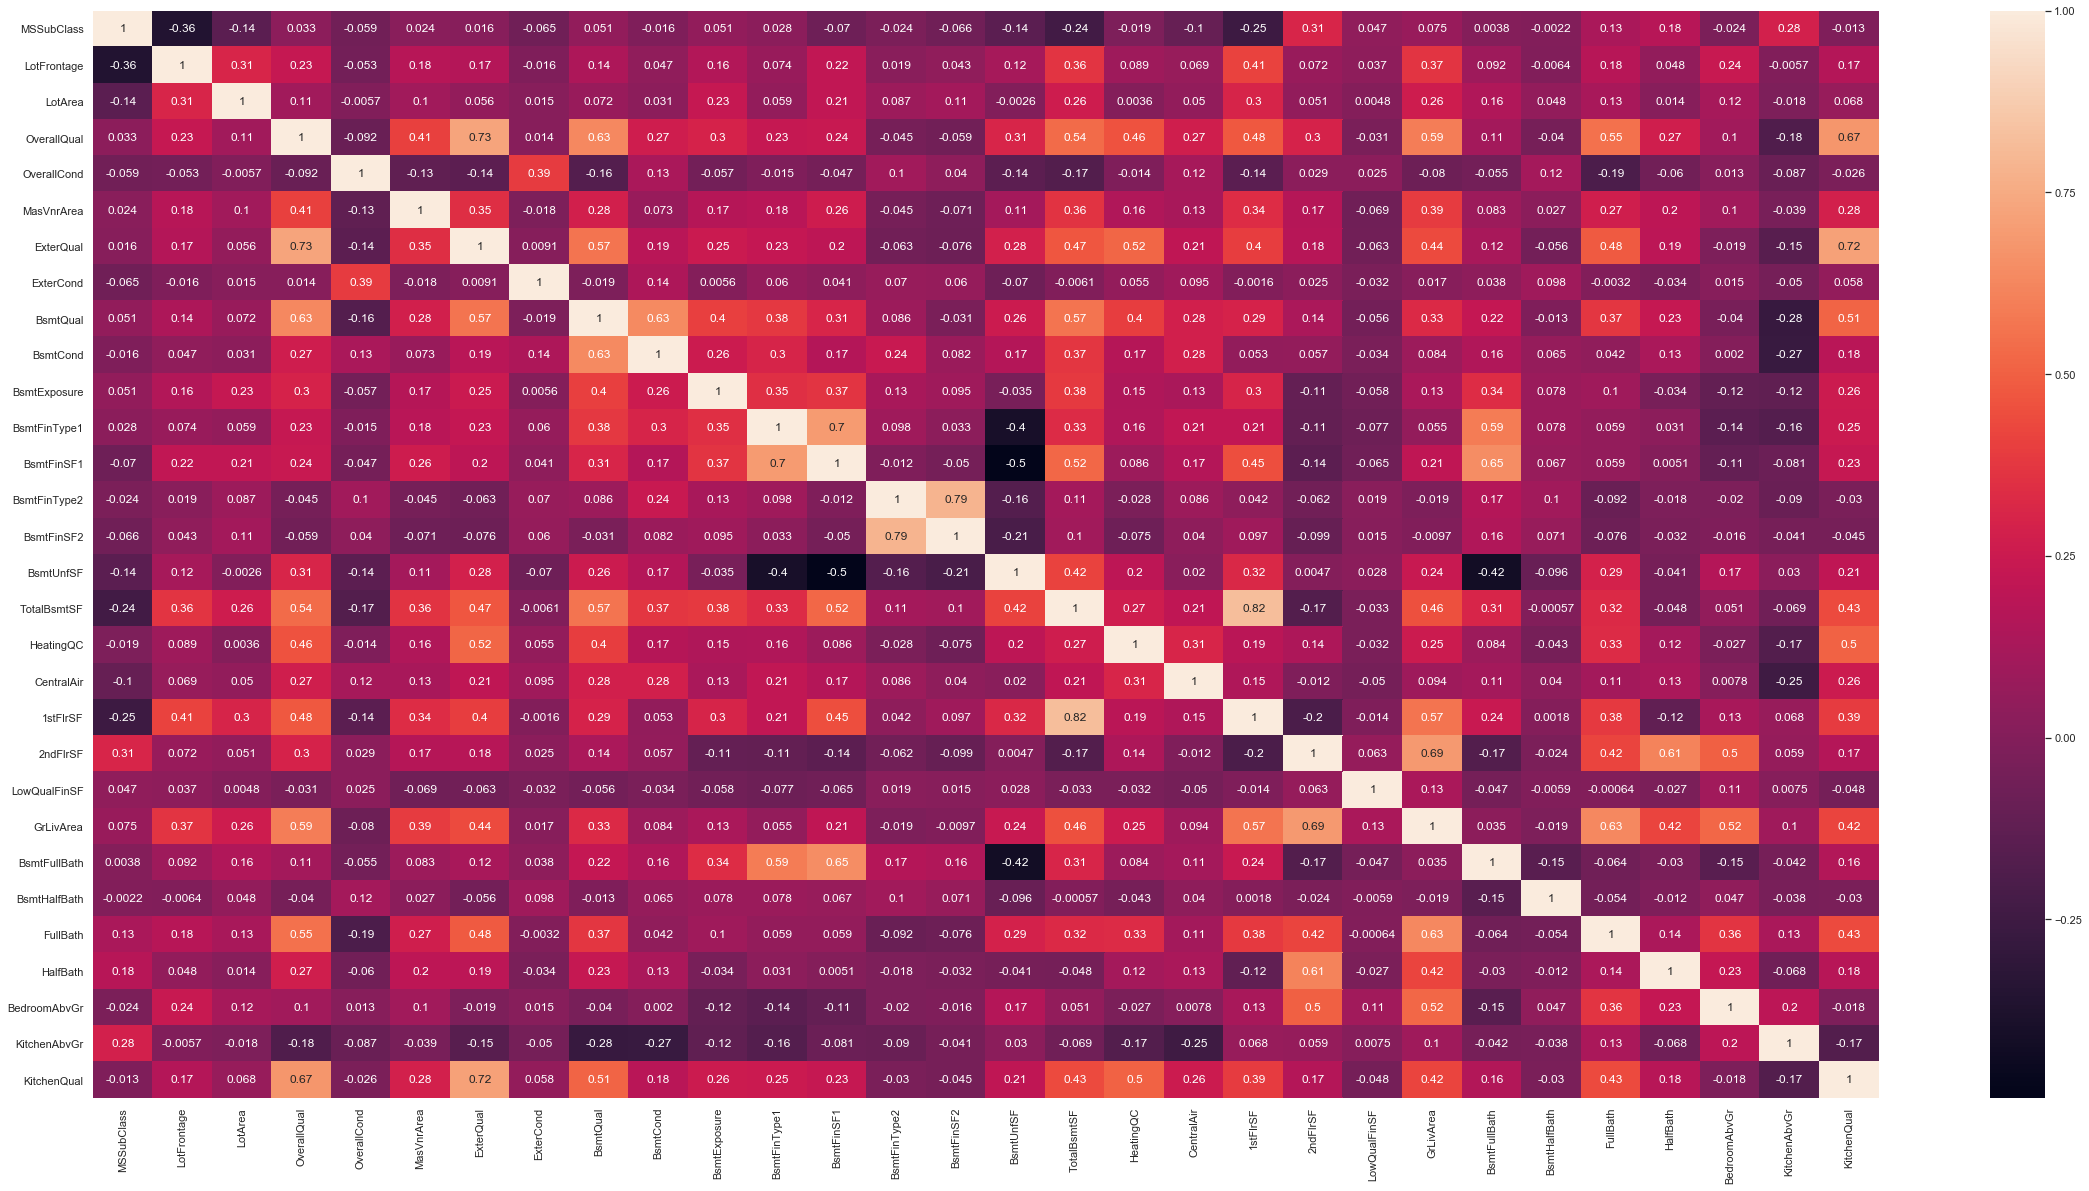

In [284]:
# Let's check correlation between all the columns
plt.figure(figsize = (40,20))
sns.set(style="white")
sns.heatmap(data[colNames[0:30]].corr(),annot=True)

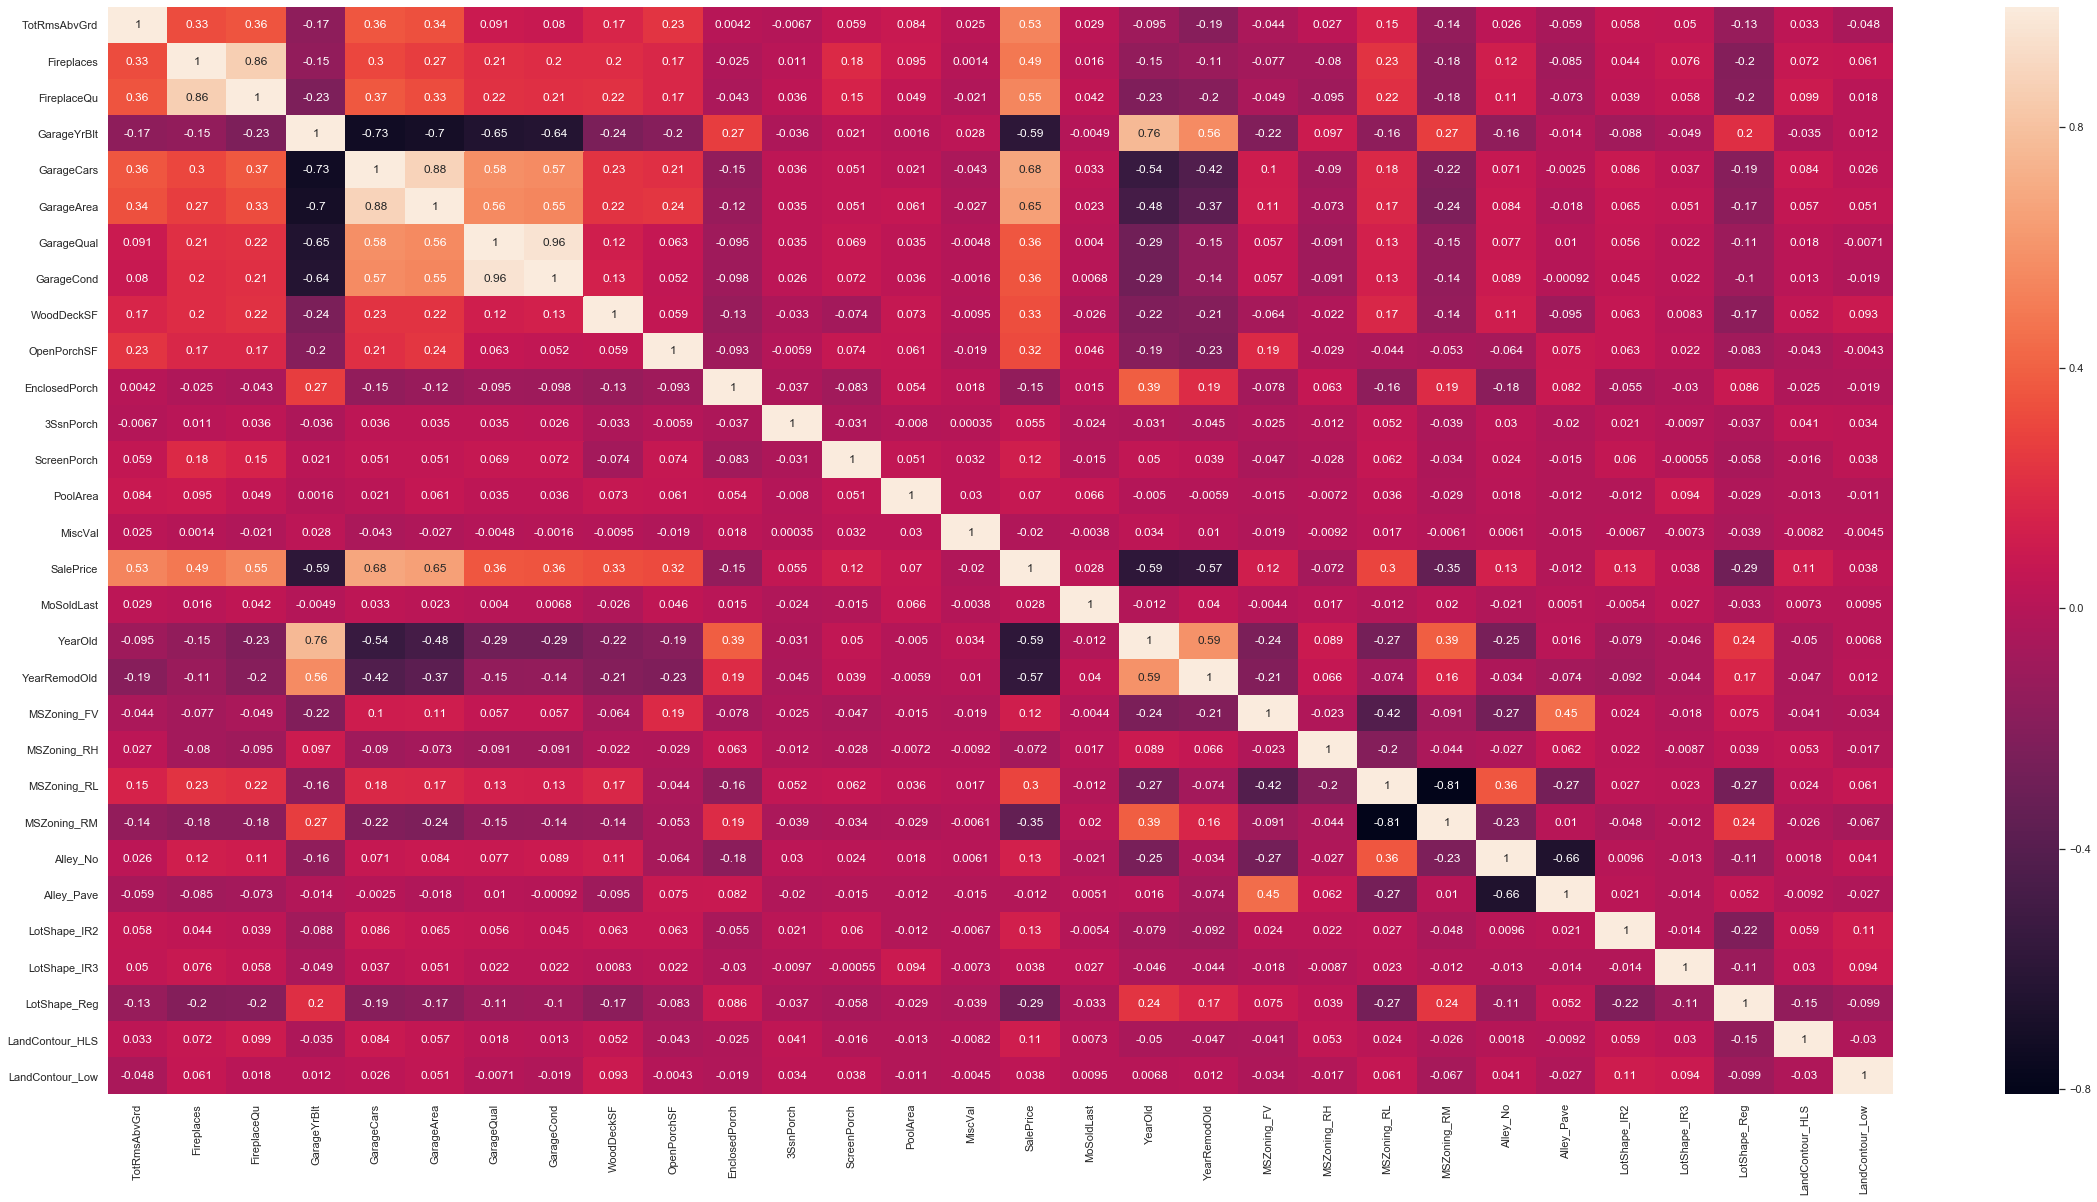

In [285]:
# Lets check correlation between all the columns
plt.figure(figsize = (40,20))
sns.set(style="white")
sns.heatmap(data[colNames[30:60]].corr(),annot=True)

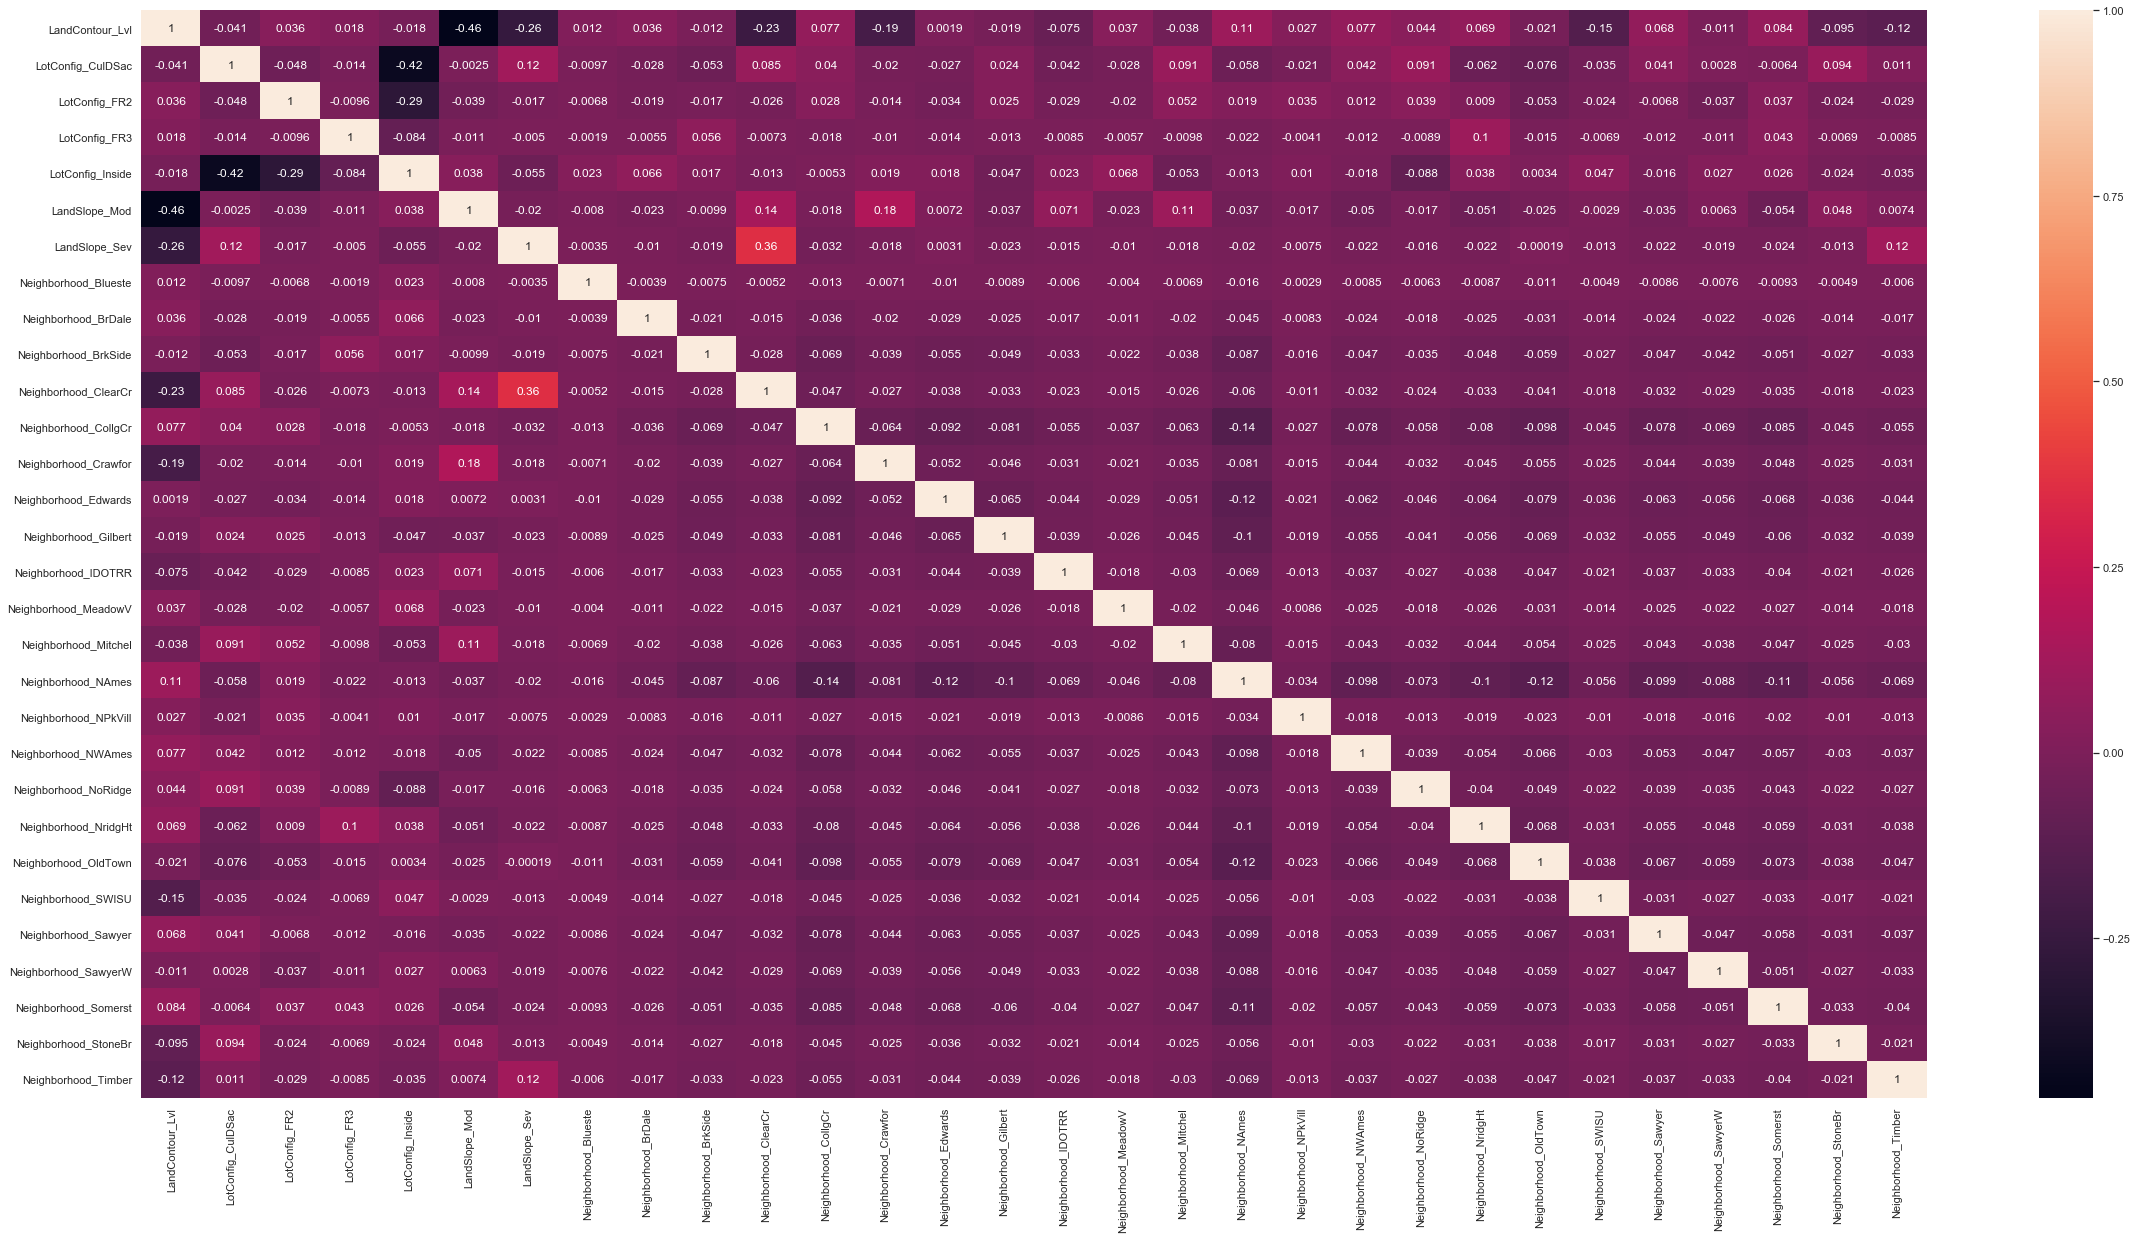

In [286]:
# Lets check correlation between all the columns
plt.figure(figsize = (40,20))
sns.set(style="white")
sns.heatmap(data[colNames[60:90]].corr(),annot=True)

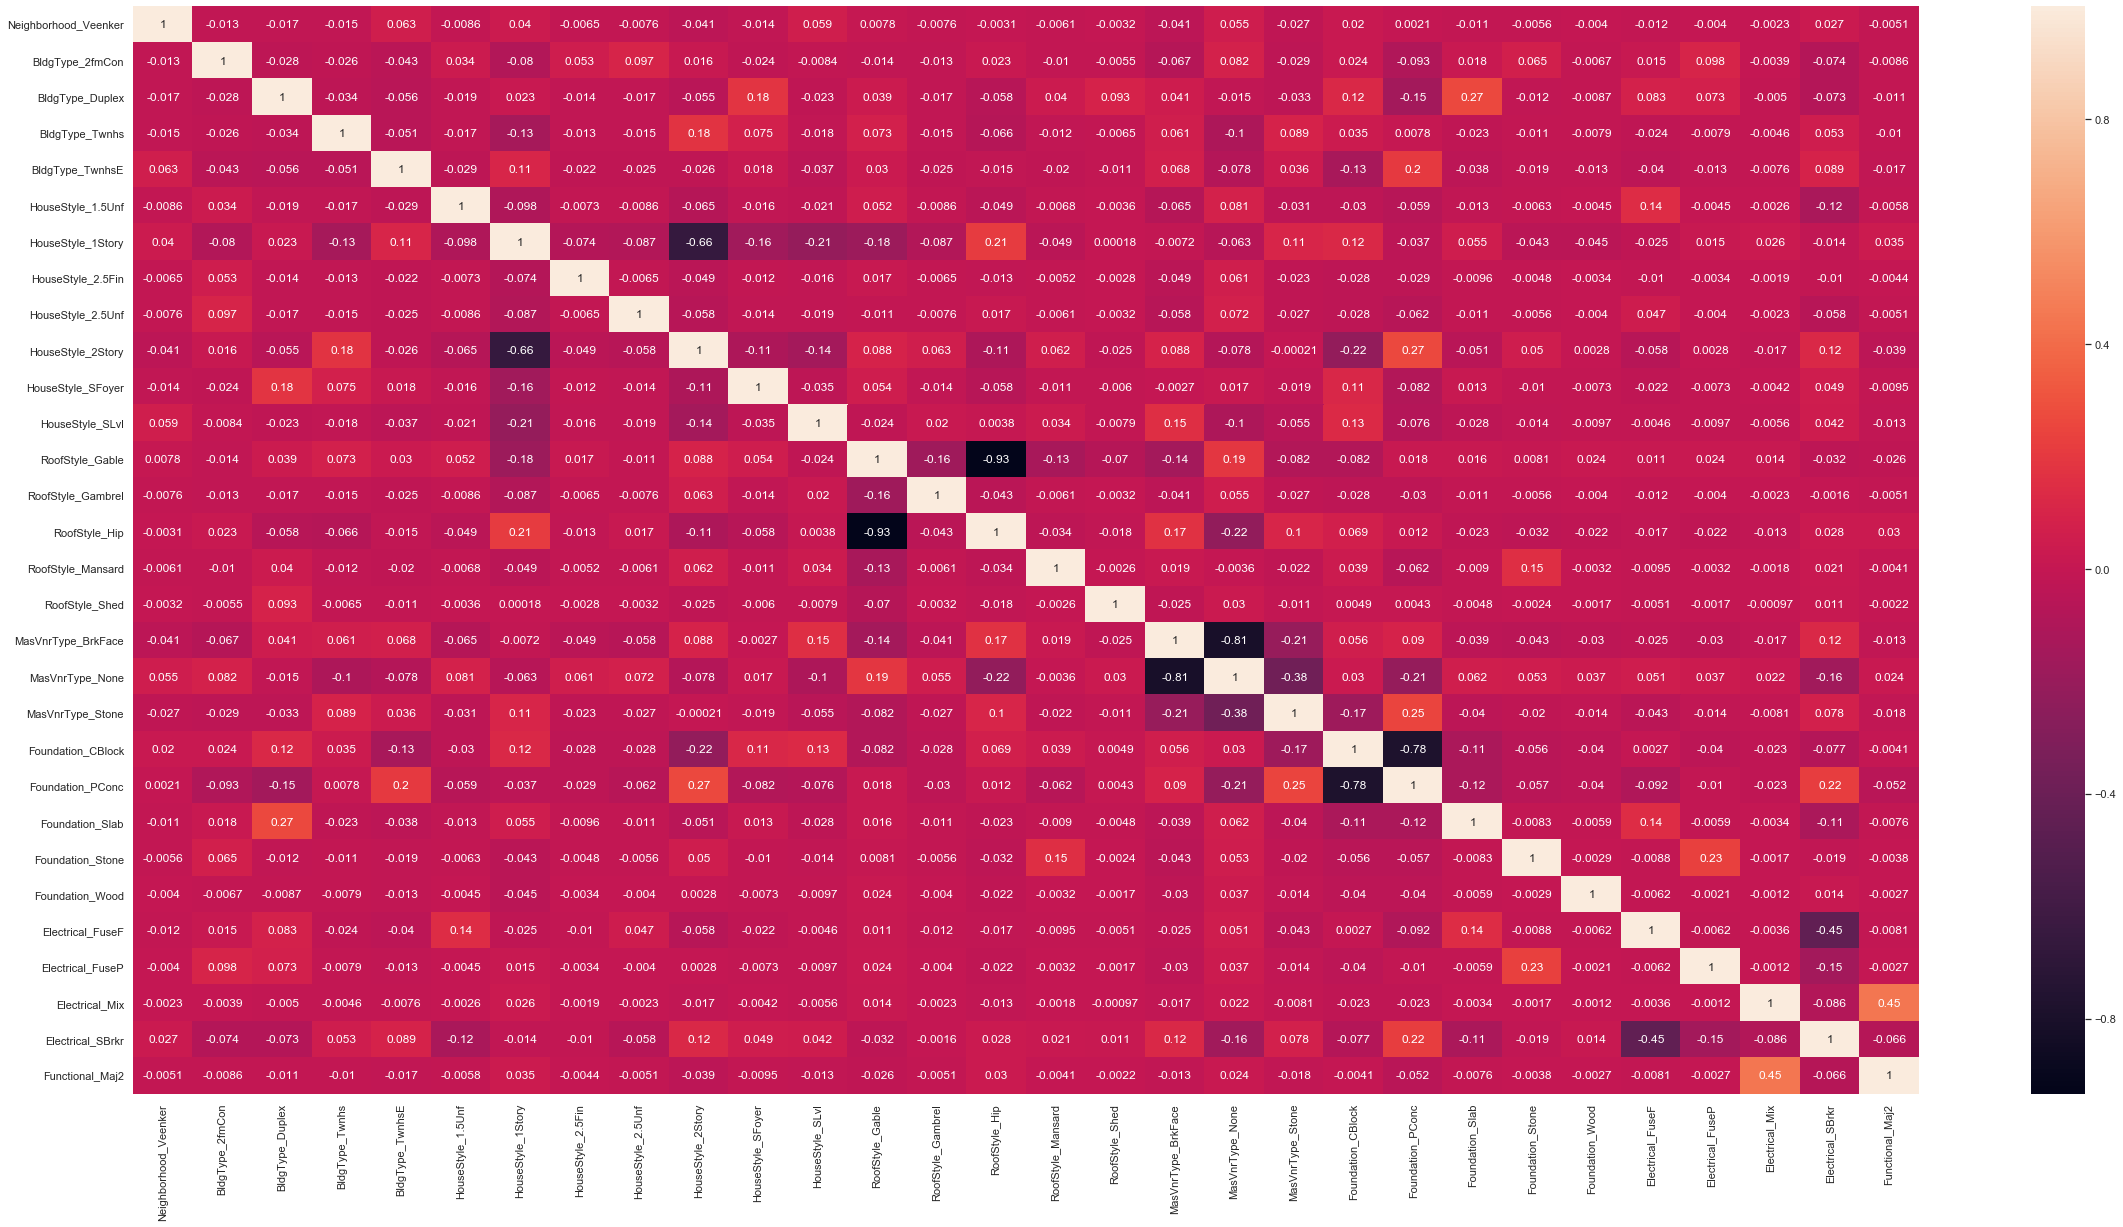

In [287]:
# Lets check correlation between all the columns
plt.figure(figsize = (40,20))
sns.set(style="white")
sns.heatmap(data[colNames[90:120]].corr(),annot=True)

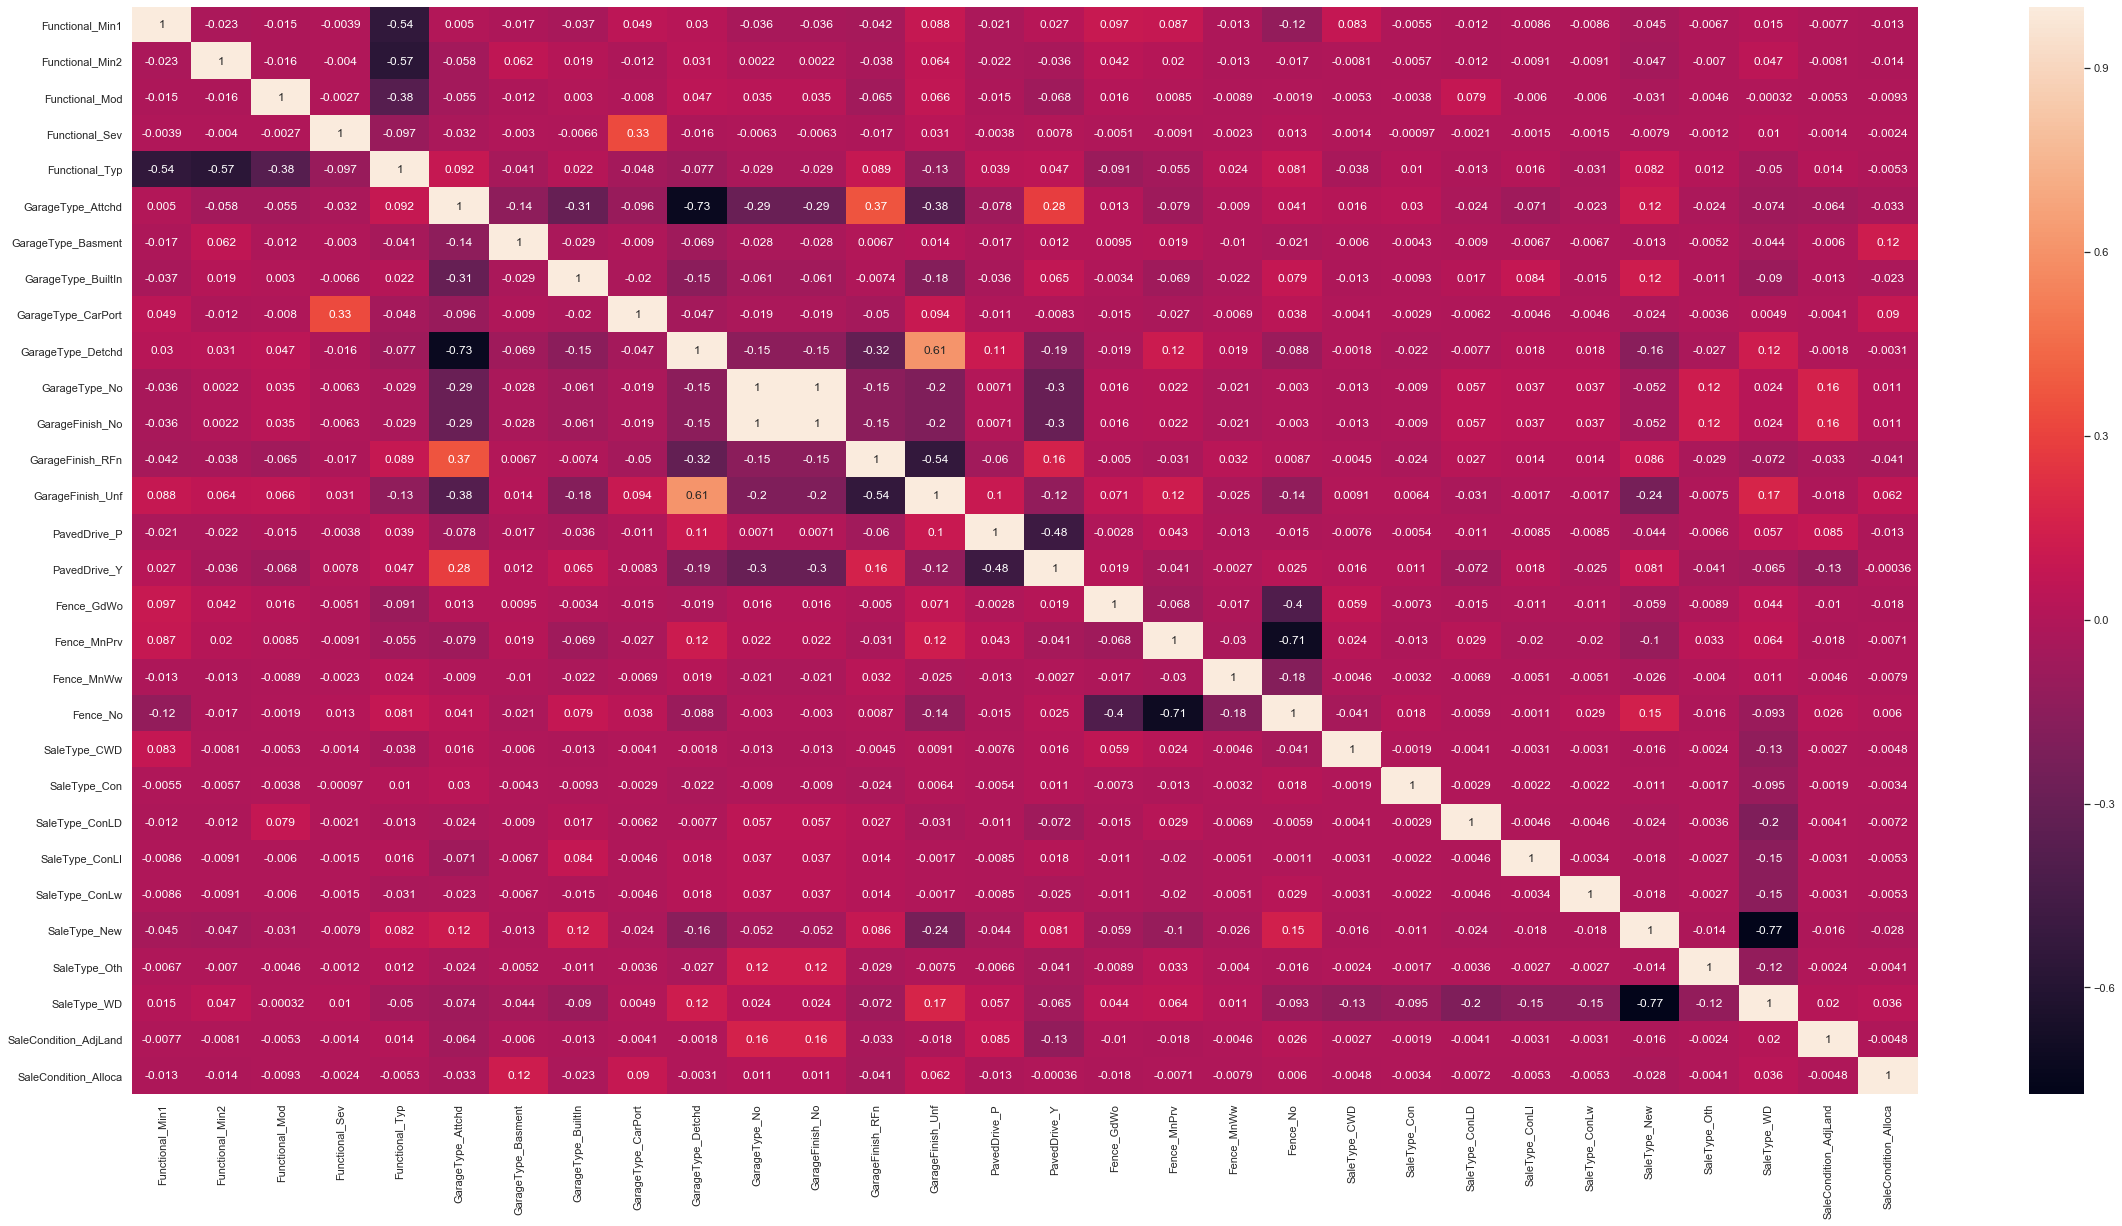

In [288]:
# Lets check correlation between all the columns
plt.figure(figsize = (40,20))
sns.set(style="white")
sns.heatmap(data[colNames[120:150]].corr(),annot=True)

In [289]:
len(colNames)

176

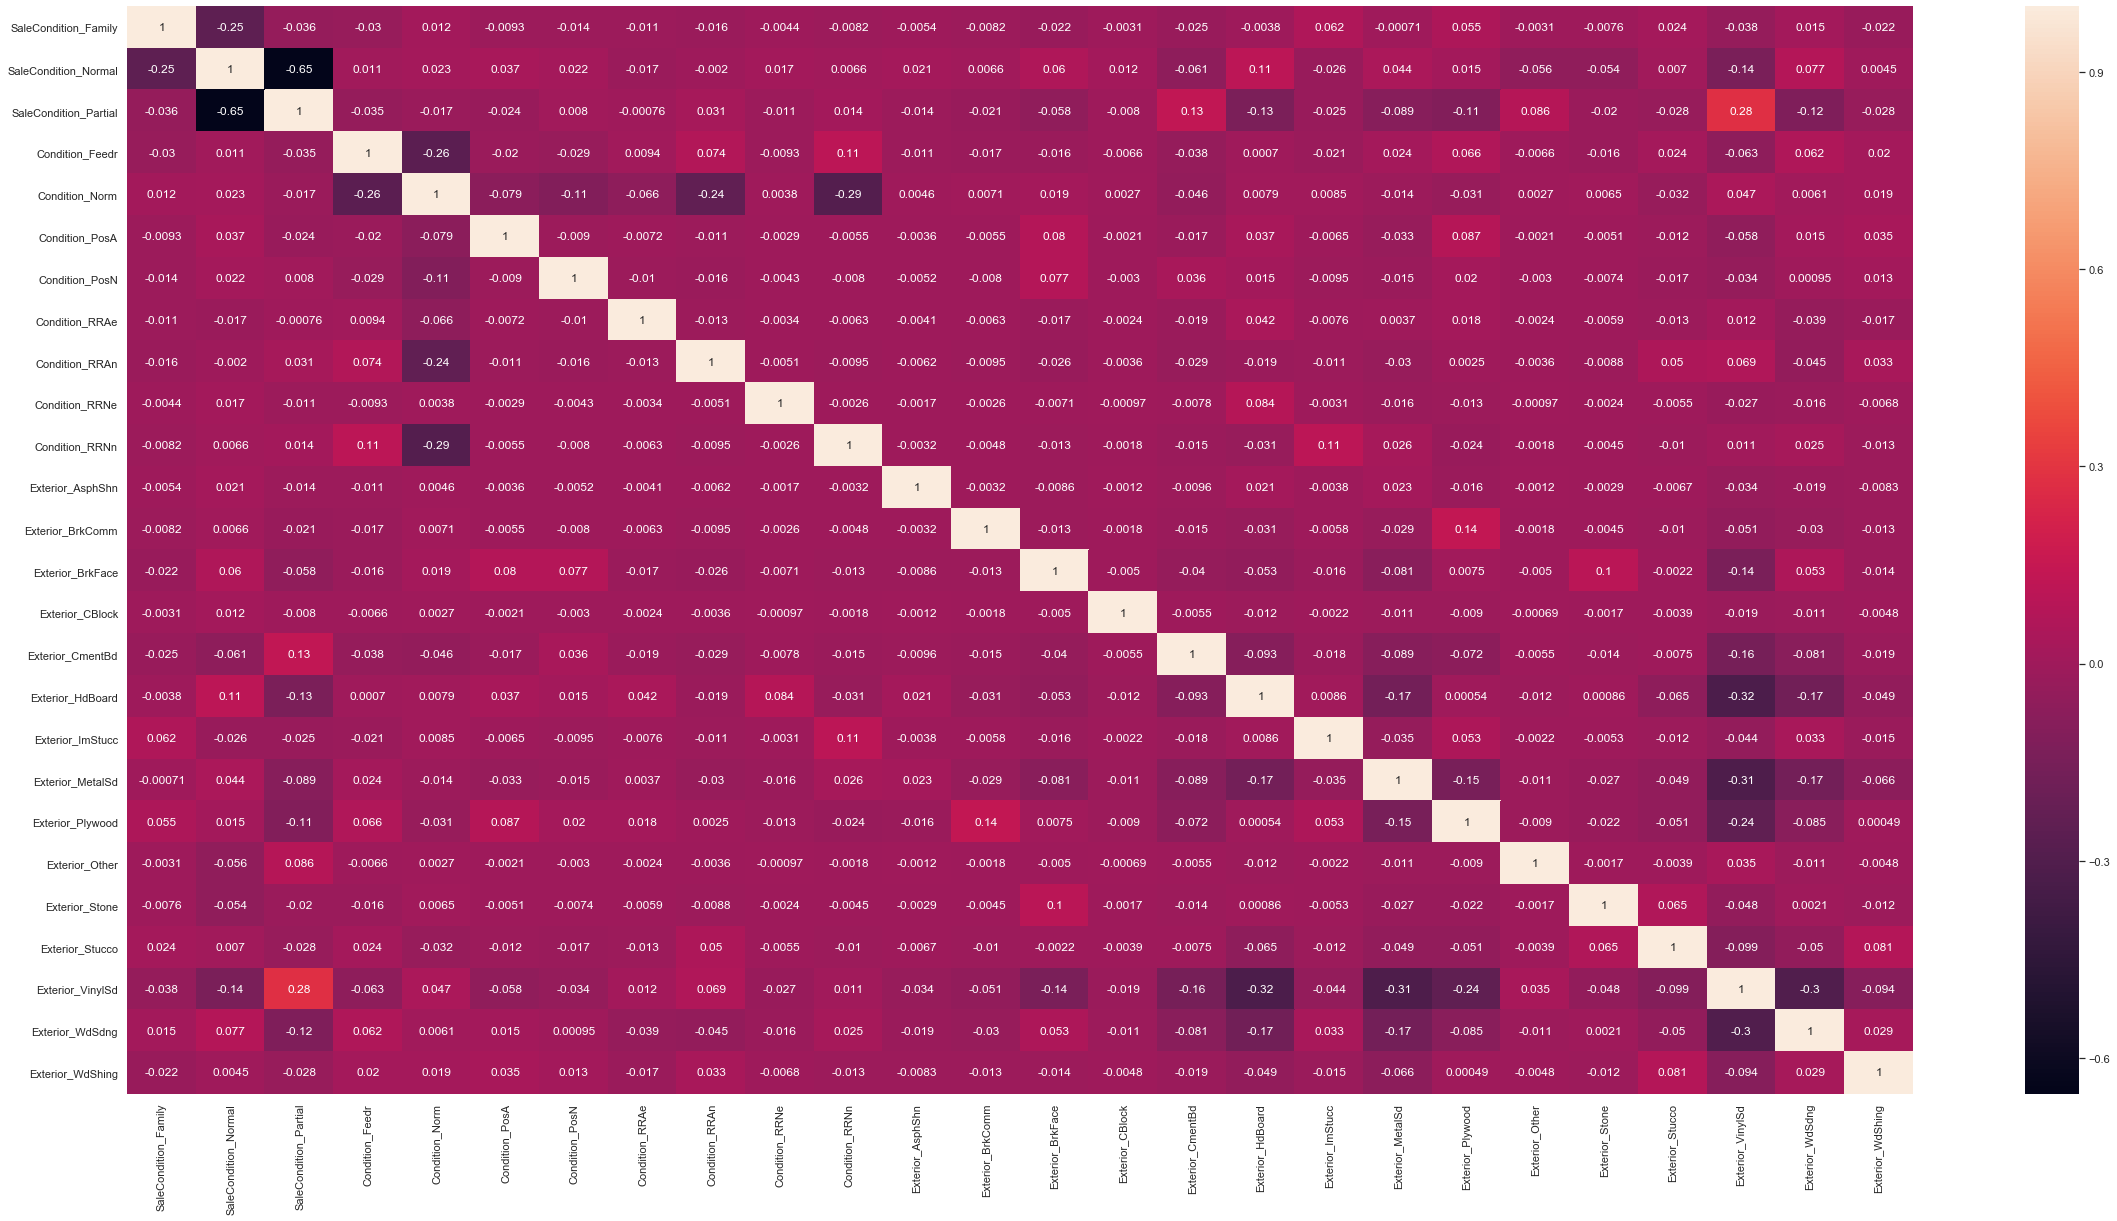

In [290]:
# Lets check correlation between all the columns
plt.figure(figsize = (40,20))
sns.set(style="white")
sns.heatmap(data[colNames[150:176]].corr(),annot=True)

##### There are few columns with the high correlation value between them hence, removing some of the columns out of them

In [291]:
# Coverting all the diagnoal values to 0 since, these value are of the same variables.
corrData = data.corr().abs()
for i in range(len(corrData)):
    corrData.iloc[i,i] = 0

In [292]:
highCorrColumn = [column for column in corrData.columns if any(corrData[column] > 0.85)]
highCorrColumn

['Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'MSZoning_FV',
 'Neighborhood_Somerst',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 'GarageType_No',
 'GarageFinish_No',
 'SaleType_New',
 'SaleCondition_Partial']

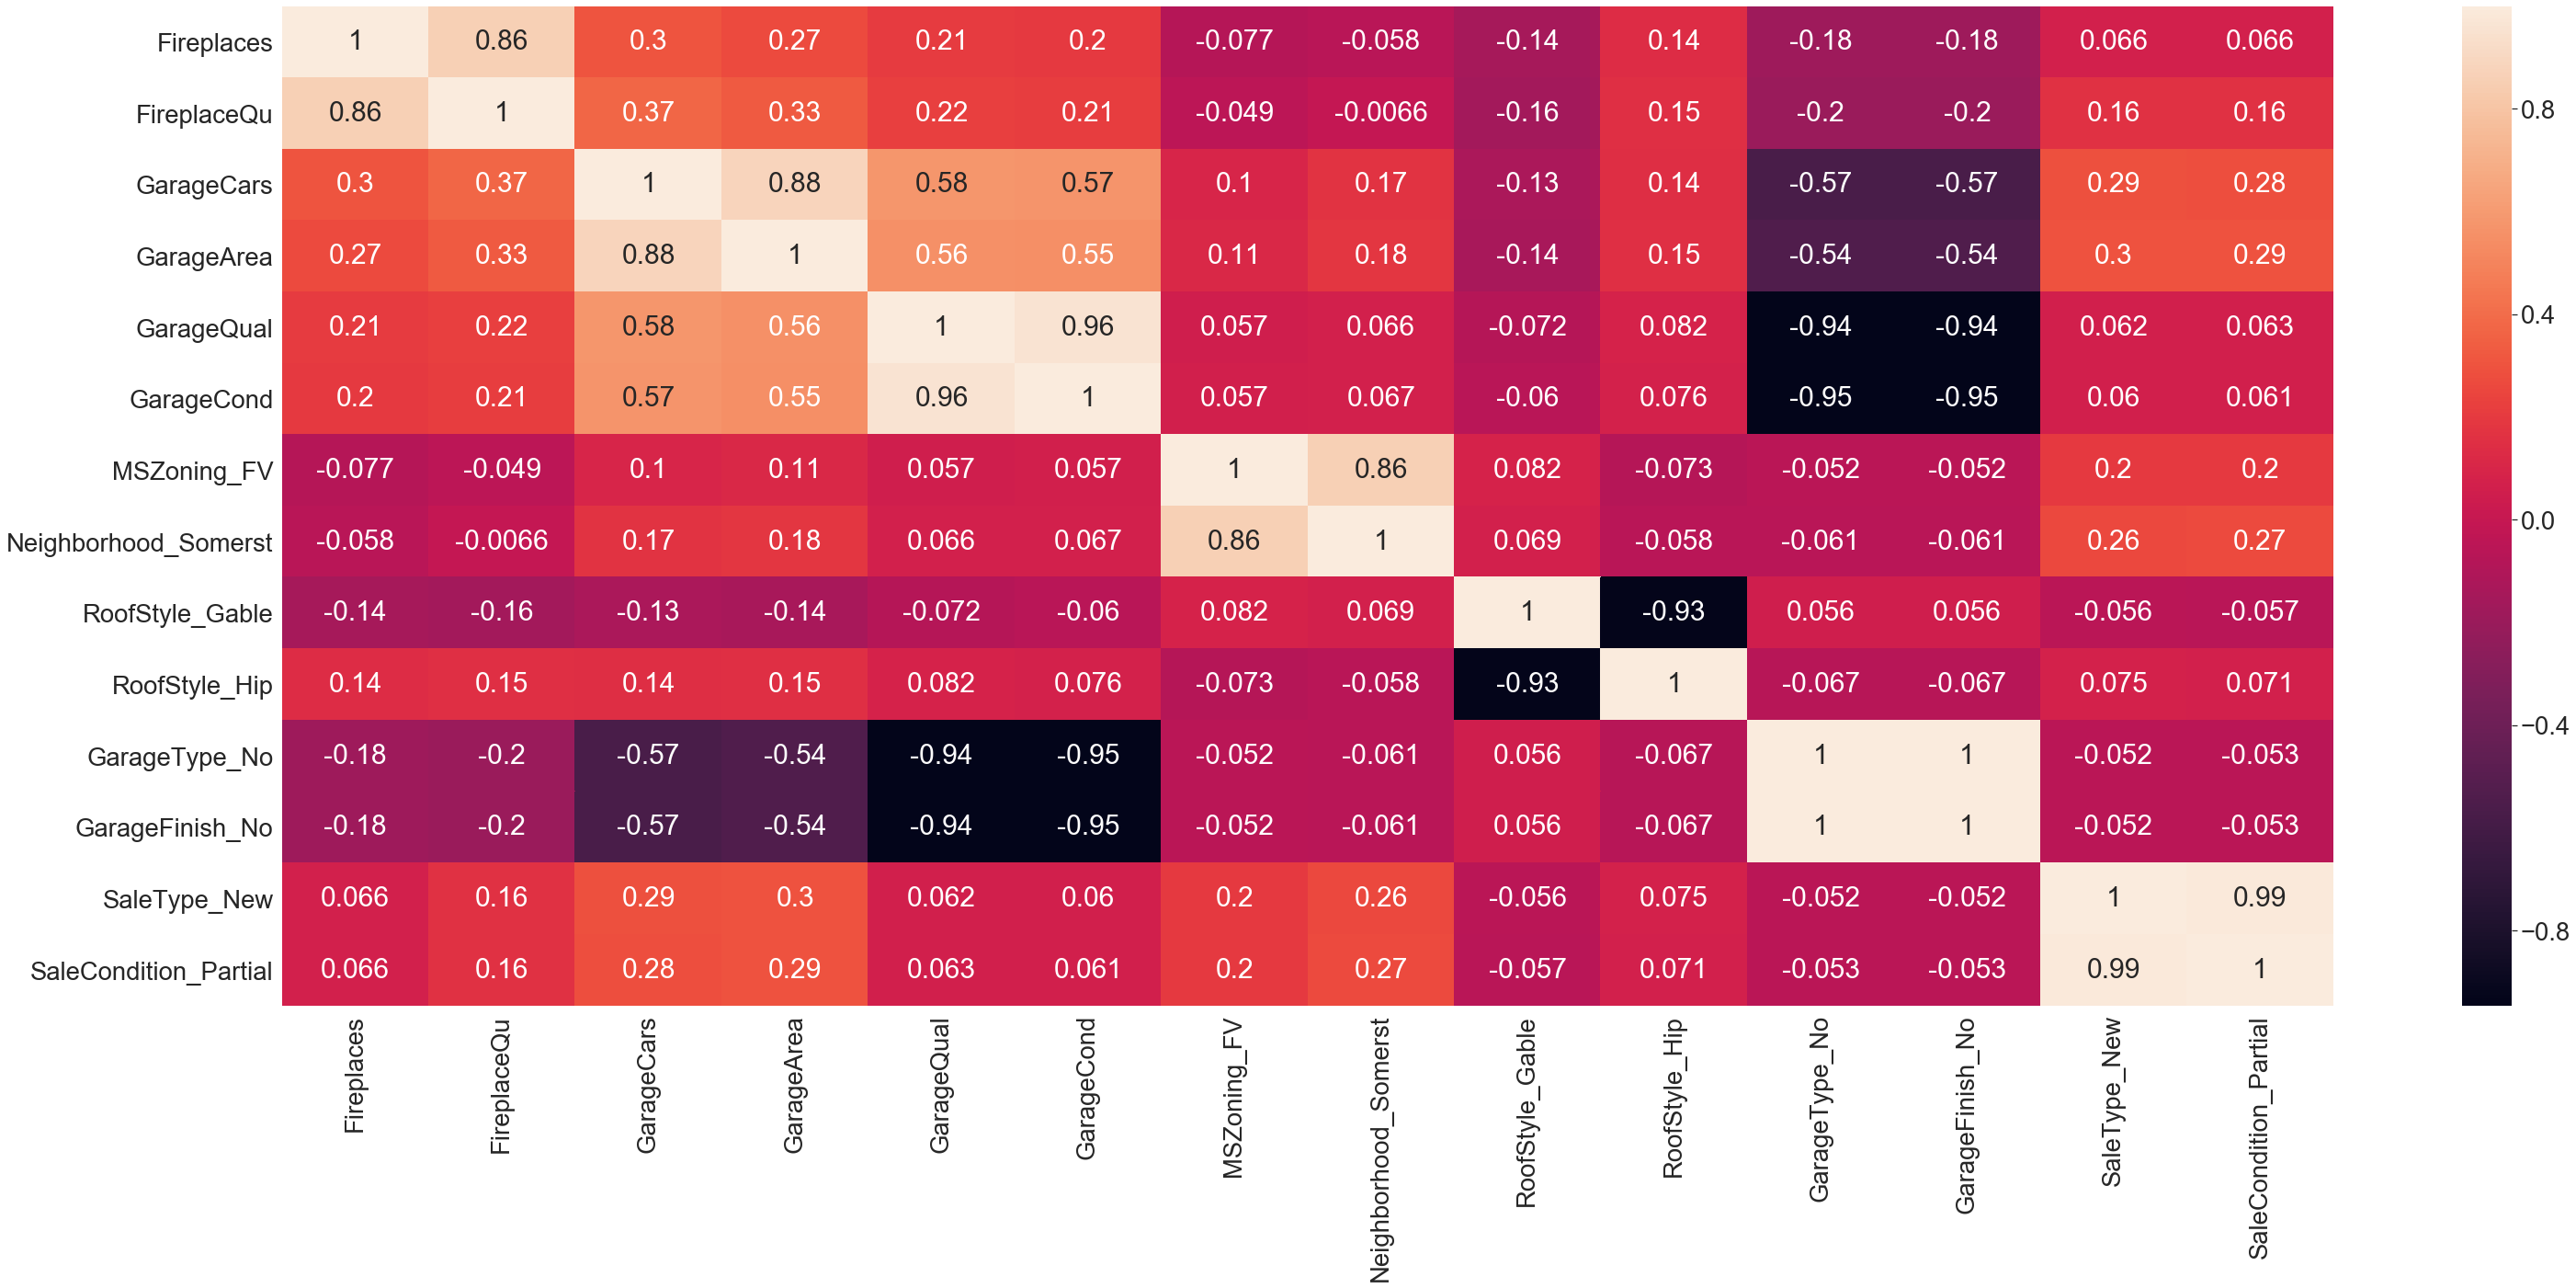

In [293]:
plt.figure(figsize = (50,20))
sns.set(style="white", font_scale=2.5)
sns.heatmap(data[highCorrColumn].corr(), annot= True)

In [294]:
# GarageCond and GarageQual are highly correlated hence removing GarageCond
# GarageType_No and GarageFinish_No are highly correlated hence removing GarageType_No
# SaleCondition_Partial and SaleType_New are highly correlated hence removing SaleCondition_Partial
# Fireplaces and FireplaceQu are highly correlated hence removing Fireplaces
# GarageCars and GarageArea are highly correlated hence removing GarageCars
# GarageFinish_No and SaleType_New are highly correlated hence removing GarageFinish_No
# Neighborhood_Somerst and MSZoning_FV are highly correlated hence removing Neighborhood_Somerst
# RoofStyle_Hip and RoofStyle_Gable are highly correlated hence removing RoofStyle_Hip

highCorrCol = ['GarageCond', 'GarageType_No', 'SaleCondition_Partial', 'Fireplaces', 'GarageCars', 'GarageFinish_No', 'Neighborhood_Somerst', 'RoofStyle_Hip']
data.drop(highCorrCol, axis=1, inplace= True)

In [295]:
corrData = data.corr().abs()
for i in range(len(corrData)):
    corrData.iloc[i,i] = 0

highCorrColumn = [column for column in corrData.columns if any(corrData[column] > 0.85)]
highCorrColumn

[]

### Building the model

In [296]:
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)

In [297]:
scaler = StandardScaler()

In [298]:
colNames = list(df_train.columns)

In [299]:
df_train[colNames] = scaler.fit_transform(df_train[colNames])
df_test[colNames] = scaler.transform(df_test[colNames])

In [300]:
X_train = df_train.drop('SalePrice', axis=1)

In [301]:
y_train = df_train.SalePrice

In [302]:
X_test = df_test.drop('SalePrice', axis=1)
y_test = df_test.SalePrice

In [303]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
984     0.787494     0.215246 -0.049244    -0.790233    -0.512364   -0.555867   
1416    3.177599    -0.470381  0.067048    -1.500469     0.384932   -0.555867   
390    -0.168548    -0.927466 -0.213872    -0.790233     2.179524   -0.555867   
877     0.070462     0.169538 -0.172811     2.050710    -0.512364    0.591698   
567    -0.885580    -0.013296 -0.044841     0.630239    -0.512364    0.336684   

      ExterQual  ExterCond  BsmtQual  BsmtCond  ...  Exterior_HdBoard  \
984   -0.696415  -0.250859 -3.770417 -4.885474  ...         -0.431081   
1416  -0.696415  -0.250859 -0.518154  0.139444  ...         -0.431081   
390   -0.696415  -0.250859 -0.518154  1.814417  ...         -0.431081   
877    1.021073  -0.250859  1.650022  0.139444  ...         -0.431081   
567    1.021073  -0.250859  0.565934  0.139444  ...         -0.431081   

      Exterior_ImStucc  Exterior_MetalSd  Exterior_Plywood  Exterior_Other  \
984          -0.088867         -0.432677          2.907525             0.0   
1416         -0.088867         -0.432677         -0.343935             0.0   
390          -0.088867          2.311193         -0.343935             0.0   
877          -0.088867         -0.432677         -0.343935             0.0   
567          -0.088867         -0.432677         -0.343935             0.0   

      Exterior_Stone  Exterior_Stucco  Exterior_VinylSd  Exterior_WdSdng  \
984        -0.070152        -0.151809         -0.723796        -0.435863   
1416       -0.070152        -0.151809          1.381605        -0.435863   
390        -0.070152        -0.151809         -0.723796        -0.435863   
877        -0.070152        -0.151809          1.381605        -0.435863   
567        -0.070152        -0.151809          1.381605        -0.435863   

      Exterior_WdShing  
984          -0.191176  
1416         -0.191176  
390          -0.191176  
877          -0.191176  
567          -0.191176  

[5 rows x 167 columns]

#### Finding the top 30 variables using the RFE

In [304]:
rfe = RFE(LinearRegression(), 30)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=30, step=1, verbose=0)

In [305]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 102),
 ('LotArea', False, 7),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 62),
 ('ExterQual', False, 78),
 ('ExterCond', False, 68),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 73),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', False, 5),
 ('BsmtFinType2', False, 70),
 ('BsmtFinSF2', False, 4),
 ('BsmtUnfSF', False, 6),
 ('TotalBsmtSF', False, 3),
 ('HeatingQC', True, 1),
 ('CentralAir', False, 40),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 120),
 ('FullBath', False, 14),
 ('HalfBath', False, 16),
 ('BedroomAbvGr', False, 26),
 ('KitchenAbvGr', False, 44),
 ('KitchenQual', False, 27),
 ('TotRmsAbvGrd', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageYrBlt', False, 13),
 ('GarageArea', True, 1),
 ('GarageQual', False, 12),
 ('WoodDeckSF', False, 32),
 ('OpenPorchSF', Fal

In [306]:
selectedCol = X_train.columns[rfe.support_]
selectedCol

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'TotRmsAbvGrd', 'FireplaceQu',
       'GarageArea', 'PoolArea', 'YearOld', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Foundation_PConc',
       'Exterior_BrkFace'],
      dtype='object')

In [307]:
X_train = X_train[selectedCol]
X_test = X_test[selectedCol]

### Finding the optimum value of alpha for the Ridge model using GreadSearchCV

In [308]:
params = {'alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

ridge = Ridge()

folds = 5

model_cv = GridSearchCV(estimator=ridge,
                     param_grid=params,
                     scoring = 'neg_mean_absolute_error',
                    cv= folds,
                     return_train_score = True,
                     verbose = 1
                    )
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [309]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.010227      0.006664         0.004012        0.003175       0.001   
1       0.004417      0.001033         0.001604        0.000493        0.01   
2       0.004411      0.000802         0.001605        0.000492        0.05   
3       0.003203      0.000745         0.001401        0.000485         0.1   
4       0.002607      0.000491         0.001403        0.000491         0.5   
5       0.003208      0.001170         0.001805        0.000400           1   
6       0.002407      0.000491         0.001209        0.000413           5   
7       0.002411      0.000507         0.001006        0.000003          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.219717          -0.234160          -0.253636   
1   {'alpha': 0.01}          -0.219715          -0.234154          -0.253639   
2   {'alpha': 0.05}          -0.219707          -0.234127          -0.253651   
3    {'alpha': 0.1}          -0.219696          -0.234095          -0.253666   
4    {'alpha': 0.5}          -0.219609          -0.233840          -0.253781   
5      {'alpha': 1}          -0.219504          -0.233540          -0.253916   
6      {'alpha': 5}          -0.218790          -0.232723          -0.254710   
7     {'alpha': 10}          -0.218113          -0.233968          -0.255286   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.229639  ...        -0.233685        0.011096                8   
1          -0.229635  ...        -0.233684        0.011097                7   
2          -0.229619  ...        -0.233678        0.011104                6   
3          -0.229599  ...        -0.233671        0.011113                5   
4          -0.229447  ...        -0.233616        0.011182                4   
5          -0.229267  ...        -0.233550        0.011266                3   
6          -0.228108  ...        -0.233330        0.011810                1   
7          -0.227066  ...        -0.233496        0.012276                2   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.225838           -0.223159           -0.211723   
1           -0.225838           -0.223159           -0.211723   
2           -0.225836           -0.223159           -0.211719   
3           -0.225834           -0.223159           -0.211715   
4           -0.225821           -0.223160           -0.211684   
5           -0.225806           -0.223163           -0.211680   
6           -0.225760           -0.223186           -0.211872   
7           -0.225925           -0.223249           -0.212115   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.215155           -0.224512         -0.220077         0.005592  
1           -0.215154           -0.224511         -0.220077         0.005592  
2           -0.215153           -0.224505         -0.220074         0.005592  
3           -0.215151           -0.224497         -0.220071         0.005592  
4           -0.215138           -0.224437         -0.220048         0.005592  
5           -0.215125           -0.224405         -0.220036         0.005587  
6           -0.215155           -0.224532         -0.220101         0.005538  
7           -0.215635           -0.224680         -0.220321         0.005446  

[8 rows x 21 columns]

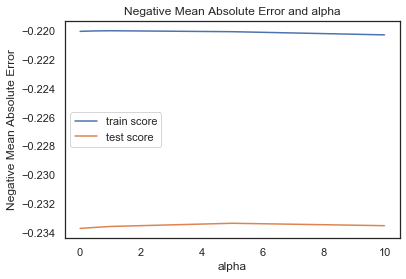

In [310]:
# plotting mean test and train scoes with alpha
sns.set(style="white", font_scale=1)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='center left')

##### The optimum value of alpha looks 5 fro the Ridge model

In [311]:
ridge = Ridge(alpha = 5)
ridge.fit(X_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [312]:
lis = list(zip(X_train.columns, ridge.coef_))
lis.sort(key = lambda x: x[1])
lis

[('YearOld', -0.16842820703564368),
 ('MSSubClass', -0.07701893608532831),
 ('PoolArea', -0.07272094825247895),
 ('Neighborhood_Edwards', -0.05047259632739622),
 ('LowQualFinSF', 0.013518610130398423),
 ('TotRmsAbvGrd', 0.04147841173550185),
 ('Neighborhood_NoRidge', 0.04571062457834277),
 ('Exterior_BrkFace', 0.04866114779755121),
 ('Foundation_PConc', 0.05016484997412691),
 ('BsmtExposure', 0.05439450804046579),
 ('BsmtFinType1', 0.05687706722102669),
 ('HeatingQC', 0.05869924209858607),
 ('LandContour_HLS', 0.06080730941550154),
 ('BsmtQual', 0.06202371551131783),
 ('BsmtFullBath', 0.06222791196259792),
 ('Neighborhood_NridgHt', 0.06331818745011963),
 ('Neighborhood_Crawfor', 0.06436097050414837),
 ('LandContour_Lvl', 0.0752479531246327),
 ('FireplaceQu', 0.0809480945004719),
 ('LandContour_Low', 0.08724739297243078),
 ('MSZoning_RH', 0.09057937690342058),
 ('2ndFlrSF', 0.1050318782349621),
 ('GarageArea', 0.1087696157548126),
 ('1stFlrSF', 0.12156120048153564),
 ('OverallCond', 0.1

In [313]:
y_train_pred = ridge.predict(X_train)
r2_score(y_train, y_train_pred)

0.8977199046635624

In [314]:
y_test_pred = ridge.predict(X_test)
r2_score(y_test, y_test_pred)

0.8273374212015293

##### Doubling the value of alpha to check the consiquence in the Ridge model

In [315]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [316]:
lis = list(zip(X_train.columns, ridge.coef_))
lis.sort(key = lambda x: x[1])
lis

[('YearOld', -0.16867217546107524),
 ('MSSubClass', -0.07605066828806585),
 ('PoolArea', -0.07190247927458855),
 ('Neighborhood_Edwards', -0.05007060206035278),
 ('LowQualFinSF', 0.012032748280794144),
 ('TotRmsAbvGrd', 0.04326415572810555),
 ('Neighborhood_NoRidge', 0.04553403115621841),
 ('Exterior_BrkFace', 0.048647161388230734),
 ('Foundation_PConc', 0.05098150396499124),
 ('BsmtExposure', 0.05405230179987252),
 ('BsmtFinType1', 0.056928852194057786),
 ('HeatingQC', 0.05881421410048351),
 ('LandContour_HLS', 0.059819128892789564),
 ('BsmtQual', 0.06184550697149123),
 ('Neighborhood_NridgHt', 0.06265131495819745),
 ('BsmtFullBath', 0.06266063405235862),
 ('Neighborhood_Crawfor', 0.06397397162708834),
 ('LandContour_Lvl', 0.07392945694235518),
 ('MSZoning_RH', 0.07745010674098313),
 ('FireplaceQu', 0.08137851389612238),
 ('LandContour_Low', 0.08488112280846546),
 ('2ndFlrSF', 0.10383247693830247),
 ('GarageArea', 0.10785991518823541),
 ('1stFlrSF', 0.12124379038693074),
 ('OverallCon

In [317]:
y_train_pred = ridge.predict(X_train)

r2_score(y_train, y_train_pred)

0.897213877387028

In [318]:
y_test_pred = ridge.predict(X_test)
r2_score(y_test, y_test_pred)

0.8278818426931678

### Finding the optimum value of alpha for the Lasso model using GreadSearchCV

In [319]:
params = {'alpha':[0, 0.0001, 0.001, 0.01]}
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [320]:
result = pd.DataFrame(model_cv.cv_results_)
result

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.026475      0.010429         0.001813        0.000405           0   
1       0.021055      0.003042         0.001405        0.000492      0.0001   
2       0.011430      0.001204         0.001203        0.000402       0.001   
3       0.003609      0.000500         0.001607        0.000488        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0       {'alpha': 0}          -0.219718          -0.234160          -0.253636   
1  {'alpha': 0.0001}          -0.219638          -0.233997          -0.253708   
2   {'alpha': 0.001}          -0.219047          -0.232680          -0.254316   
3    {'alpha': 0.01}          -0.217712          -0.240266          -0.254771   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.229639  ...        -0.233685        0.011096                3   
1          -0.229492  ...        -0.233627        0.011150                2   
2          -0.228232  ...        -0.233172        0.011609                1   
3          -0.223382  ...        -0.233945        0.013033                4   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.225838           -0.223159           -0.211724   
1           -0.225794           -0.223115           -0.211653   
2           -0.225489           -0.222851           -0.211521   
3           -0.228736           -0.224256           -0.212779   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.215155           -0.224513         -0.220077         0.005592  
1           -0.215102           -0.224430         -0.220019         0.005596  
2           -0.214813           -0.224164         -0.219768         0.005552  
3           -0.217483           -0.225331         -0.221717         0.005772  

[4 rows x 21 columns]

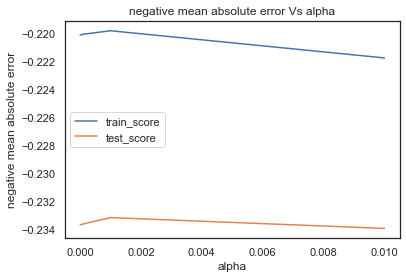

In [321]:
#Plotting the result
plt.plot(result.param_alpha, result.mean_train_score)
plt.plot(result.param_alpha, result.mean_test_score)
plt.xlabel('alpha')
plt.ylabel('negative mean absolute error')
plt.title('negative mean absolute error Vs alpha')
plt.legend(['train_score', 'test_score'], loc='center left')

In [322]:
lasso = Lasso(alpha= 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [323]:
lis = list(zip(X_train.columns, lasso.coef_))
lis.sort(key = lambda x: x[1])
lis

[('YearOld', -0.16771096081160275),
 ('MSSubClass', -0.07617411450905019),
 ('PoolArea', -0.07241770033484517),
 ('Neighborhood_Edwards', -0.05034875565886905),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0011327458356436902),
 ('1stFlrSF', 0.025015222543310695),
 ('TotRmsAbvGrd', 0.0388375926814813),
 ('Neighborhood_NoRidge', 0.0446995859489697),
 ('Exterior_BrkFace', 0.047692617128532414),
 ('Foundation_PConc', 0.04892656289412642),
 ('BsmtExposure', 0.05386237273403727),
 ('BsmtFinType1', 0.0565091721260102),
 ('LandContour_HLS', 0.05832554554461715),
 ('HeatingQC', 0.05845675207619623),
 ('BsmtFullBath', 0.06160831752671139),
 ('BsmtQual', 0.061792247296431006),
 ('Neighborhood_NridgHt', 0.06253766110105821),
 ('Neighborhood_Crawfor', 0.06350612286990752),
 ('LandContour_Lvl', 0.07195428069726305),
 ('FireplaceQu', 0.08021841358816599),
 ('LandContour_Low', 0.08532615919503134),
 ('MSZoning_RH', 0.09407864380593203),
 ('GarageArea', 0.10909247273594778),
 ('OverallCond', 0.128559896039

In [324]:
y_train_pred = lasso.predict(X_train)
r2_score(y_train, y_train_pred)

0.897807706721679

In [325]:
y_test_pred = lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8285232645801046

##### Doubling the value of alpha in the Lasso model

In [326]:
lasso = Lasso(alpha= 0.002)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [327]:
lis = list(zip(X_train.columns, lasso.coef_))
lis.sort(key = lambda x: x[1])
lis

[('YearOld', -0.16878807937490076),
 ('MSSubClass', -0.07433412227616974),
 ('PoolArea', -0.07145575212606357),
 ('Neighborhood_Edwards', -0.04939680084886815),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('1stFlrSF', 0.025635923095129895),
 ('TotRmsAbvGrd', 0.038002351492732685),
 ('Neighborhood_NoRidge', 0.04339112419341399),
 ('Exterior_BrkFace', 0.046850187498613804),
 ('Foundation_PConc', 0.04859784197254041),
 ('BsmtExposure', 0.05286181730990394),
 ('LandContour_HLS', 0.054901398580373066),
 ('BsmtFinType1', 0.056110288738787775),
 ('HeatingQC', 0.058084351284820784),
 ('BsmtQual', 0.060747176386866074),
 ('Neighborhood_NridgHt', 0.060837623644449064),
 ('BsmtFullBath', 0.061810191692824985),
 ('Neighborhood_Crawfor', 0.062322467592965065),
 ('LandContour_Lvl', 0.06754474166127909),
 ('MSZoning_RH', 0.0781063137021288),
 ('FireplaceQu', 0.08003455231656385),
 ('LandContour_Low', 0.08055944777731398),
 ('GarageArea', 0.10790370530799169),
 ('OverallCond', 0.12879907406740668),
 

In [328]:
y_train_pred = lasso.predict(X_train)
r2_score(y_train, y_train_pred)

0.8972489233373326

In [329]:
y_test_pred = lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8300776038457507

### Removing the 5 most important variables and building the model again i.e. MSZoning, GrLivArea, OverallQual, OverallCond, and YearOld

In [330]:
X_train.filter(regex = 'MSZoning.*').columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM'], dtype='object')

In [331]:
X_train.drop(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GrLivArea', 'OverallQual', 'OverallCond', 'YearOld'],
            axis = 1, inplace=True)

In [332]:
lasso = Lasso(alpha= 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [333]:
lis = list(zip(X_train.columns, lasso.coef_))
lis.sort(key = lambda x: x[1])
lis

[('MSSubClass', -0.0882355350367626),
 ('PoolArea', -0.08194468270465836),
 ('Neighborhood_Edwards', -0.06918590673196993),
 ('LowQualFinSF', -0.0021022420927992065),
 ('TotRmsAbvGrd', 0.025997054612684384),
 ('BsmtFullBath', 0.030080309160647033),
 ('Exterior_BrkFace', 0.04451183488222299),
 ('Neighborhood_NoRidge', 0.0449661782289167),
 ('BsmtExposure', 0.06478919005751631),
 ('Neighborhood_Crawfor', 0.07149184010188615),
 ('LandContour_Low', 0.07294030947642466),
 ('Neighborhood_NridgHt', 0.07443108799739162),
 ('LandContour_HLS', 0.07848303074577763),
 ('LandContour_Lvl', 0.09896104252521558),
 ('FireplaceQu', 0.11057549080460909),
 ('BsmtFinType1', 0.11627670641850847),
 ('Foundation_PConc', 0.12179878695129155),
 ('HeatingQC', 0.12460824660372362),
 ('BsmtQual', 0.14020085762946388),
 ('GarageArea', 0.16967969074289996),
 ('2ndFlrSF', 0.2959253157372891),
 ('1stFlrSF', 0.32062292223172917)]

In [334]:
y_train_pred = lasso.predict(X_train)
r2_score(y_train, y_train_pred)

0.8330383486575312

In [335]:
X_test.drop(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'GrLivArea', 'OverallQual', 'OverallCond', 'YearOld'],
            axis = 1, inplace=True)
y_test_pred = lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.7392137494358862

### Checking if the model is robust and generalisable

In [336]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [337]:
y_train_pred = linear.predict(X_train)
r2_score(y_train, y_train_pred)

0.8330610336210829

In [338]:
y_test_pred = linear.predict(X_test)
r2_score(y_test,y_test_pred)

0.7368490359491516

The accuracy has dipped by 10% for the normal linear regression model hence it has shown us that the Ridge and Lasso models are more robust and generalisable.